## SIMULACIÓ##

In [70]:
import os 
import numpy as np
import math as m
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from scipy.io import FortranFile

#READ DATA FUNCTION: 

def read_data(arxiu):
    
    """
    This function reads the data from
    the files, by choosing the file we 
    are interested to study.
    -Arguments: 
        arxiu: number of the file.
        
    """
    
    print('DATA FROM FILE:      ',arxiu)
    str1 = "/Users/miquelmiravet/Documents/University/Máster/Assignatures/Project/Tomek/mriquel-0file.dat" 
    ubi=str1.replace('file',arxiu)
    with FortranFile(ubi,'r','>u4') as f: 
        # read time
        time=f.read_reals(dtype='>f8')
        print ("time                     = ", time)
        # read dimensions of the grid
        nr = f.read_reals(dtype='>i4')[0]
        nphi = f.read_reals(dtype='>i4')[0]
        nz = f.read_reals(dtype='>i4')[0]
        print ("nr x nphi x nz           = ",nr," x ",nphi," x ",nz)
        # read grid arrays (1D)
        r = f.read_reals(dtype='>f8')
        phi = f.read_reals(dtype='>f8')
        z = f.read_reals(dtype='>f8')
        print ("len(r), len(phi), len(z) = ",len(r), len(phi), len(z))

        # read variables on the grid (3D arrays)
        Br = np.reshape(f.read_reals(dtype='>f8'),(nr,nphi,nz),'F')
        print ("Br                       : ",Br.shape)
        Bphi = np.reshape(f.read_reals(dtype='>f8'),(nr,nphi,nz),'F')
        print ("Bphi                     : ",Bphi.shape)
        Bz = np.reshape(f.read_reals(dtype='>f8'),(nr,nphi,nz),'F')
        print ("Bz                       : ",Bz.shape)
        vr = np.reshape(f.read_reals(dtype='>f8'),(nr,nphi,nz),'F')
        print ("vr                       : ",vr.shape)
        vphi = np.reshape(f.read_reals(dtype='>f8'),(nr,nphi,nz),'F')
        print ("vphi                     : ",vphi.shape)
        vz = np.reshape(f.read_reals(dtype='>f8'),(nr,nphi,nz),'F')
        print ("vz                       : ",vz.shape)
        rho = np.reshape(f.read_reals(dtype='>f8'),(nr,nphi,nz),'F')
        print ("rho                      : ",rho.shape)
        Pgas = np.reshape(f.read_reals(dtype='>f8'),(nr,nphi,nz),'F')
        print ("Pgas                     : ",Pgas.shape)
        phi2 = np.reshape(f.read_reals(dtype='>f8'),(nr,nphi,nz),'F')
        print ("phi                      : ",phi2.shape)
         
        
    return [time, r, phi, z, Br, Bphi, Bz, vr, vphi, vz, rho, Pgas, phi2] 

#GRAFS FUNCTION: 
def grafs(arxiu, phi):
    
    """
    This function makes plots of
    all the variables from the file, 
    by keeping the angular coordinate 
    constant. We have a loop in order to
    make all the plots in a quick way. 
    -Arguments:
        arxiu: file we are going to 
        study.
        
        phi: number of the component from 
        the 1D array that corresponds to the
        angular coordinate. 
        
    """
    
    listvar = read_data(arxiu) #read the data
    r = listvar[1]
    r = np.array(r)*10**(-2)
    z = listvar[3]
    z = np.array(z)*10**(-2)
    for x in range(0,3):
        listvar[x+7] = np.array(listvar[x+7])*10**(-2) 
    #list of strings in order to name the plot files:
    variables = ['B_r_'+arxiu,'B_phi_'+arxiu,'B_z_'+arxiu,'v_r_'+arxiu,'v_phi_'+arxiu,'v_z_'+arxiu,'dens_'+arxiu,'press_'+arxiu,'phi_'+arxiu]
    print("PLOTS FROM FILE:         ")
    print("time                       =", listvar[0])
    zcoord, rcoord = np.meshgrid(z,r)
    nvar = ['time','r coord','phi coord','z coord','Radial component of B','Angular component of B','z-component of B','Radial component of v','Angular component of v','z-component of v','Density','Pressure', 'Potential']
    #list with the legend of the plots
    varlegend = ['$B_r$ [G]','$B_{\phi}$ [G]','$B_z$ [G]','$v_r$ [$m$ $s^{-1}$]','$v_{\phi}$ [$m$ $s^{-1}$] ','$v_z$ [$m$ $s^{-1}$]','Density [$g$ $cm^{-3}$]','Pressure','$\phi$']
    #take phi = ctt: 
    ang = listvar[2] #we show the angular coordinate we fix
    print("Value of phi               :", ang[phi]," rads") #units of phi?
    for x in range(4,13):
        print(nvar[x])
        arr3d = listvar[x] #3D array 
        Z = arr3d[:,phi,:] #2D array by keeping a ctt phi coordinate
        print("Dimensions of new array    :", Z.shape) #to check the dimensions
        fig = plt.figure(figsize=(6,2),dpi=72)
        plt.contourf(rcoord,zcoord,Z, 20 ,cmap='PRGn') #plotting
        cbar = plt.colorbar();
        cbar.ax.set_ylabel(varlegend[x-4])
        plt.xlabel('r [m]')
        plt.ylabel('z [m]')
        #plt.xticks(fontsize=13)
        #plt.yticks(fontsize=13)
        fig = plt.gcf()
        #fig.set_size_inches(10, 3.3)
        fig.suptitle('t = ' +str(listvar[0])+' s,$\phi = $'+str(round(ang[phi],7))+' rads')
        plt.savefig('Simulation/Plots/'+variables[x-4]+'_'+str(round(ang[phi],7))+'.eps',bbox_inches = 'tight')
        plt.show()
    return()

#AVERAGING AND STRESS TENSORS FUNCTION: 

def averaging(arxiu):
    listvar=read_data(arxiu)
    # volume element:
    r = listvar[1]
    phi = listvar[2]
    z = listvar[3]
    dr = (r[1]-r[0])*10**(-2)
    print('dr   =', dr,' m')
    dphi = phi[1]-phi[0]
    print('dphi =', dphi,' rads')
    dz = (z[1]-z[0])*10**(-2)
    print('dz   =', dz,' m')
    dV = r*dr*dphi*dz*10**(-2)
    dVmatrix = np.ones((len(r),len(phi),len(z)))
    for x in range(0,len(r)):
        dVmatrix[x,:,:] = dV[x]*dVmatrix[x,:,:]
    print('Volume element dim:', dVmatrix.shape)
    #total volume: 
    V = np.sum(dVmatrix)
    print('Volume:', V*10**(-9), 'km3')
    print('Volume check:', 1*1*0.3,'km3')

    #averaging:
    var_dec = [listvar[4],listvar[5],listvar[6],listvar[7],listvar[8],listvar[9],listvar[10],listvar[11]]
    meanvar=np.zeros(8)
    for y in range(0,8):
        integrand = dVmatrix*var_dec[y]
        print('Integrand dimension:',integrand.shape)
        meanvar[y] = np.sum(integrand)/V
    #print('mean Br       :', meanvar[0],' G')
    #print('mean Bphi     :', meanvar[1],' G')
    #print('mean Bz       :', meanvar[2],' G')
    #print('mean vr       :', meanvar[3]*10**(-2),' m/s')
    #print('mean vphi     :', meanvar[4]*10**(-2),' m/s')
    #print('mean vz       :', meanvar[5]*10**(-2),' m/s')

    #turbulent parts:
    turb = np.zeros((6,100,100,34))
    for x in range(0,6):
        turb[x] = var_dec[x]-meanvar[x]
        print('Turbulent matrix shape:', turb.shape)
        brturb = turb[0]
        bphiturb = turb[1]
        bzturb = turb[2]
        vrturb = turb[3]*10**(-2) #to m/s
        vphiturb = turb[4]*10**(-2)
        vzturb = turb[5]*10**(-2)
    print('max turbulent Br  :', np.amax(turb[0]),' G')
    print('ratio turb/mean Br:', np.amax(turb[0])/meanvar[0])
    print('max turbulent Bphi:', np.amax(turb[1]),' G')
    print('ratio Bphi        :', np.amax(turb[1])/meanvar[1])
    print('max turbulent Bz  :', np.amax(turb[2]),' G')
    print('ratio Bz          :', np.amax(turb[2])/meanvar[2])
    print('max turbulent vr  :', np.amax(vrturb),' m/s')
    print('ratio vr          :', np.amax(vrturb)/meanvar[3])
    print('max turbulent vphi:', np.amax(vphiturb),' m/s')
    print('ratio vphi        :', np.amax(vphiturb)/meanvar[4])
    print('max turbulent vz  :', np.amax(vzturb),' m/s')
    print('ratio vz          :', np.amax(vzturb)/meanvar[5])

    #stress tensors:
    bturb = [brturb, bphiturb, bzturb]
    vturb = [vrturb, vphiturb, vzturb]
    M = np.zeros((3,3,100,100,34))
    R = np.zeros((3,3,100,100,34))
    F = np.zeros((3,3,100,100,34))
    for x in range(0,3):
        for y in range(0,3):
            M[x][y] = bturb[x]*bturb[y]
            R[x][y] = vturb[x]*vturb[y]
            F[x][y] = bturb[x]*vturb[y]        
    print('Maxwell stress tensor :', M.shape)
    print('Reynolds stress tensor:', R.shape)
    print('Faraday stress tensor :', F.shape)
    #averaging of the turbulent stress tensors:
    stresses = [M,R,F]
    stresses = np.array(stresses)
    print('Stresses shape:', stresses.shape)
    print('dV matrix shape:', dVmatrix.shape)
    mean_stresses = np.zeros((3,3,3))
    for x in range(0,3):
        print('STRESS TENSOR Nº           :', x+1)
        int_stress = dVmatrix*stresses[x]
        int_stress = np.sum(int_stress,axis=4)
        print('Summation in nz. Dimensions:', int_stress.shape)
        int_stress = np.sum(int_stress,axis=3)
        print('Summation in nphi. Dimensions:', int_stress.shape)
        int_stress = np.sum(int_stress,axis=2)
        print('Summation in nr. Dimensions:', int_stress.shape)
        mean_stresses[x] = int_stress/V
    Mmean = mean_stresses[0]
    Rmean = mean_stresses[1]
    Fmean = mean_stresses[2]
    print('Mean Maxwell stress tensor :', Mmean.shape)
    print('Mean Reynolds stress tensor:', Rmean.shape)
    print('Mean Faraday stress tensor :', Fmean.shape)
    
    #vmean in units of c
    for y in range(0,3):
        meanvar[y+3] = meanvar[y+3]*10**(-2)/299792458
    
    return meanvar, Mmean, Rmean, Fmean

#FILE CREATION FOR MEAN QUANTITIES: 

def mean_file(filename):
    bmean_t = np.zeros((61,3))
    vmean_t = np.zeros((61,3))
    Mmean_t = np.zeros((61,3,3))
    Rmean_t = np.zeros((61,3,3))
    Fmean_t = np.zeros((61,3,3))
    for x in range(0,61):
        arx = format(10*x, "03")
        varlist = read_data(arx)
        t = varlist[0]
        mean_variables = averaging(arx)
        bvmean = mean_variables[0]
        bmean_t[x] = (bvmean[0],bvmean[1],bvmean[2])
        vmean_t[x] = (bvmean[3],bvmean[4],bvmean[5])
        Mmean = mean_variables[1]
        Mmean_t[x] = Mmean
        Rmean = mean_variables[2]
        Rmean_t[x] = Rmean
        Fmean = mean_variables[3]
        Fmean_t[x] = Fmean
    cols = zip(bmean_t[:,0],bmean_t[:,1],bmean_t[:,2],vmean_t[:,0],vmean_t[:,1],vmean_t[:,2],Mmean_t[:,0,0],Mmean_t[:,1,0],Mmean_t[:,2,0],Mmean_t[:,1,1],Mmean_t[:,1,2],Mmean_t[:,2,2],Rmean_t[:,0,0],Rmean_t[:,1,0],Rmean_t[:,2,0],Rmean_t[:,1,1],Rmean_t[:,1,2],Rmean_t[:,2,2],Fmean_t[:,0,0],Fmean_t[:,1,0],Fmean_t[:,2,0],Fmean_t[:,1,1],Fmean_t[:,1,2],Fmean_t[:,2,2])
    
    import csv
    with open(str(filename)+'.csv', 'w') as f:
        writer = csv.writer(f, delimiter='\t')
        writer.writerows(cols)
    f.close()
    
    return()


#CALCULATION OF ALPHA COEFF: 

def fem(arxiu):
    listvar=averaging(arxiu)
    Fmean = listvar[3]
    meanvar = listvar[0]
    
    fem = [Fmean[2][1]-Fmean[1][2], Fmean[0][2]-Fmean[2][0], Fmean[1][0]-Fmean[0][1]]
    alpha = [fem[0]/meanvar[0],fem[1]/meanvar[1],fem[2]/meanvar[2]]
    print('TIME: ', listvar[0])
    print('Alpha coefficient:',alpha[0],alpha[1],alpha[2])
    
    return fem, alpha

#CREATE A FILE FOR ALPHA AND EMF
def xi_alpha_file(filename):
    xi_t = np.zeros((61,3))
    alpha_t = np.zeros((61,3))
    for x in range(0,61):
        arx = format(10*x, "03")
        fem_var = fem(arx)
        xi_t[x] = fem_var[0]
        alphacoef = fem_var[1]
        alpha_t[x] = alphacoef
    cols = zip(xi_t[:,0],xi_t[:,1],xi_t[:,2],alpha_t[:,0],alpha_t[:,1],alpha_t[:,2])

    import csv
    with open(str(filename)+'.csv', 'w') as f:
        writer = csv.writer(f, delimiter='\t')
        writer.writerows(cols)
    f.close()
    
    return()

#alpha viscosity calculation
def alpha_visc(arxiu):
    listvar = read_data(arxiu)
    dens = listvar[10]
    press = listvar[11]
    mean_quants = averaging(arxiu)
    Rmean = mean_quants[2]
    Mmean = mean_quants[1]
    meanvar = mean_quants[0]
    dens = meanvar[6]
    press = meanvar[7]
    alpha_v = 1/press*(dens*Rmean-Mmean)
    return alpha_v

#file creation for alpha viscosity
def alpha_visc_file(filename):
    alpha_v_t = np.zeros((61,3,3))
    for x in range(0,61):
        arx = format(10*x, "03")
        alpha_v_t[x] = alpha_visc(arx)
    cols = zip(alpha_v_t[:,0,0],alpha_v_t[:,0,1],alpha_v_t[:,0,2],alpha_v_t[:,1,0],alpha_v_t[:,1,1],alpha_v_t[:,1,2],alpha_v_t[:,2,0],alpha_v_t[:,2,1],alpha_v_t[:,2,2])

    import csv
    with open(str(filename)+'.csv', 'w') as f:
        writer = csv.writer(f, delimiter='\t')
        writer.writerows(cols)
    f.close()
    
    return()

#splitting function for sub-boxes: 
def splitting(arr,n):
    frac = len(arr)/n
    if frac.is_integer() == False: 
        while True: 
            arr = np.delete(arr,len(arr)-1)
            frac_new = len(arr)/n
            if frac_new.is_integer() == True:
                break
    return arr


def alpha_beta_dyn(arxiu,n): 
   
    m = n+1
    listvar = read_data(arxiu)
    r = listvar[1]
    phi = listvar[2]
    z = listvar[3]

    r = splitting(r,n)
    r = np.array(r)*10**(-2)
    phi = splitting(phi,n)
    phi = np.array(phi)
    z = splitting(z,m)
    z = np.array(z)*10**(-2)

    r_split = r.reshape(n,int(len(r)/n))
    phi_split = phi.reshape(n,int(len(phi)/n))
    z_split = z.reshape(m,int(len(z)/m))
    
    Bvnew = np.zeros((2,3,len(r),len(phi),len(z)))
    B = [listvar[4],listvar[5],listvar[6]]
    B = np.array(B)
    v = [listvar[7],listvar[8],listvar[9]]
    v = np.array(v)*10**(-2)
    rBphi = np.zeros((int(len(r)),int(len(phi)),int(len(z))))
    
    for x in range(0,3):
        for i in range(0,len(r)):
            for j in range(0,len(phi)):
                Bvnew[0,x,i,j,:] = splitting(B[x,i,j,:],m)
                Bvnew[1,x,i,j,:] = splitting(v[x,i,j,:],m)
            for k in range(0,len(z)):
                Bvnew[0,x,i,:,k] = splitting(B[x,i,:,k],n)
                Bvnew[1,x,i,:,k] = splitting(v[x,i,:,k],n)
        for j in range(0,len(phi)):
            for k in range(0,len(z)):
                Bvnew[0,x,:,j,k] = splitting(B[x,:,j,k],n)
                Bvnew[1,x,:,j,k] = splitting(v[x,:,j,k],n)
            

    Bphi = Bvnew[0,1]
    for i in range(0,len(r)):
         rBphi[i,:,:] = r[i]*Bphi[i,:,:]
            
    Bvr_split = Bvnew[:,0].reshape(2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m))
    rB_phi = rBphi.reshape(n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m))
    Bvphi_split = Bvnew[:,1].reshape(2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m))
    Bvz_split = Bvnew[:,2].reshape(2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m))
                   
    dr = r[1]-r[0]
    dphi = phi[1]-phi[0]
    dz = z[1]-z[0]
    
    Bvmean_r = np.zeros((2,n,n,m))
    rBphimean = np.zeros((n,n,m))
    Bvmean_phi = np.zeros((2,n,n,m))
    Bvmean_z = np.zeros((2,n,n,m))

    dVmatrix = np.ones((n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    integrandBvr = np.zeros((2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    integrandrBphi = np.zeros((n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    integrandBvphi = np.zeros((2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    integrandBvz = np.zeros((2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    
    for y in range(0,2):
        for i in range(0,n):
            for j in range(0,n):
                for k in range(0,m):
                    dV = r_split[i]*dr*dphi*dz
                    for x in range(0,int(len(r)/n)):
                        dVmatrix[i,x,j,:,k,:] = dV[x]*dVmatrix[i,x,j,:,k,:]            
                
                    integrandBvr[y,i,:,j,:,k,:] = dVmatrix[i,:,j,:,k,:]*Bvr_split[y,i,:,j,:,k,:]
                    integrandrBphi[i,:,j,:,k,:] = dVmatrix[i,:,j,:,k,:]*rB_phi[i,:,j,:,k,:]
                    integrandBvphi[y,i,:,j,:,k,:] = dVmatrix[i,:,j,:,k,:]*Bvphi_split[y,i,:,j,:,k,:]
                    integrandBvz[y,i,:,j,:,k,:] = dVmatrix[i,:,j,:,k,:]*Bvz_split[y,i,:,j,:,k,:]
                
                    V = np.sum(dVmatrix[i,:,j,:,k,:])
                    
                    Bvmean_r[y,i,j,k] = np.sum(integrandBvr[y,i,:,j,:,k,:])/V
                    rBphimean[i,j,k] = np.sum(integrandrBphi[i,:,j,:,k,:])/V
                    Bvmean_phi[y,i,j,k] = np.sum(integrandBvphi[y,i,:,j,:,k,:])/V
                    Bvmean_z[y,i,j,k] = np.sum(integrandBvz[y,i,:,j,:,k,:])/V
    
    turbr = np.zeros((2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    turbphi = np.zeros((2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    turbz = np.zeros((2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    
    for x in range(0,2):
        for i in range(0,n):
            for j in range(0,n):
                for k in range(0,m):
                    turbr[x,i,:,j,:,k,:] = Bvr_split[x,i,:,j,:,k,:]-Bvmean_r[x,i,j,k]
                    turbphi[x,i,:,j,:,k,:] = Bvphi_split[x,i,:,j,:,k,:]-Bvmean_phi[x,i,j,k]
                    turbz[x,i,:,j,:,k,:] = Bvz_split[x,i,:,j,:,k,:]-Bvmean_z[x,i,j,k]
                    
    Bturb = np.zeros((3,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    vturb = np.zeros((3,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    Bturb[0] = turbr[0]
    Bturb[1] = turbphi[0]
    Bturb[2] = turbz[0]
    vturb[0] = turbr[1]
    vturb[1] = turbphi[1]
    vturb[2] = turbz[1]

    F = np.zeros((3,3,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    
    for p in range(0,3):
        for q in range(0,3):
            for i in range(0,n):
                for j in range(0,n):
                    for k in range(0,m):
                        F[p,q,i,:,j,:,k,:] = Bturb[p,i,:,j,:,k,:]*vturb[q,i,:,j,:,k,:]
                        
    Fmean = np.zeros((3,3,n,n,m))
    
    for p in range(0,3):
        for q in range(0,3):
            for i in range(0,n): 
                for j in range(0,n):
                    for k in range(0,m):
                        Fmean[p,q,i,j,k] = np.sum(dVmatrix[i,:,j,:,k,:]*F[p,q,i,:,j,:,k,:])/V        

    # fem: 
    fem = np.zeros((3,n,n,m))
    fem[0] = Fmean[2,1]-Fmean[1,2]
    fem[1] = Fmean[0,2]-Fmean[2,0]
    fem[2] = Fmean[1,0]-Fmean[0,1]
    fem1 = np.zeros(3)
    fem1[0] = fem[0,1,1,1]
    fem1[1] = fem[1,1,1,1]
    fem1[2] = fem[2,1,1,1]
    fem2 = np.zeros(3)
    fem2[0] = fem[0,1,1,2]
    fem2[1] = fem[1,1,1,2]
    fem2[2] = fem[2,1,1,2]
   

    #derivatives:
    dBrdr = np.zeros((n,m))
    dBrdphi = np.zeros((n,m))
    drBphidr = np.zeros((n,m))
    dBrdz1 = np.zeros((n,n))
    dBrdz2 = np.zeros((n,n))
    dBphidr = np.zeros((n,m))
    dBphidphi = np.zeros((n,m))
    dBphidz1 = np.zeros((n,n))
    dBphidz2 = np.zeros((n,n))
    dBzdr = np.zeros((n,m))
    dBzdphi = np.zeros((n,m))
    dBzdz1 = np.zeros((n,n))
    dBzdz2 = np.zeros((n,n))
    
    if n==3:
        for i in range(0,n):
            for j in range(0,m):
                dBrdr[i,j] = (Bvmean_r[0,2,i,j]-Bvmean_r[0,0,i,j])/(2*dr*int(len(r)/n))
                dBrdphi[i,j] = (Bvmean_r[0,i,2,j]-Bvmean_r[0,i,0,j])/(2*dphi*int(len(phi)/n))
                drBphidr[i,j] = (rBphimean[2,i,j]-rBphimean[0,i,j])/(2*dr*int(len(r)/n))
                dBphidr[i,j] = (Bvmean_phi[0,2,i,j]-Bvmean_phi[0,0,i,j])/(2*dr*int(len(r)/n))
                dBphidphi[i,j] = (Bvmean_phi[0,i,2,j]-Bvmean_phi[0,i,0,j])/(2*dphi*int(len(phi)/n))
                dBzdr[i,j] = (Bvmean_z[0,2,i,j]-Bvmean_z[0,0,i,j])/(2*dr*int(len(r)/n))
                dBzdphi[i,j] = (Bvmean_z[0,i,2,j]-Bvmean_z[0,i,0,j])/(2*dphi*int(len(phi)/n))
            
        for i in range(0,n):
            for j in range(0,n): 
                dBrdz1[i,j] = (Bvmean_r[0,i,j,2]-Bvmean_r[0,i,j,0])/(2*dz*int(len(z)/m))
                dBrdz2[i,j] = (Bvmean_r[0,i,j,3]-Bvmean_r[0,i,j,1])/(2*dz*int(len(z)/m))
                dBphidz1[i,j] = (Bvmean_phi[0,i,j,2]-Bvmean_phi[0,i,j,0])/(2*dz*int(len(z)/m))
                dBphidz2[i,j] = (Bvmean_phi[0,i,j,3]-Bvmean_phi[0,i,j,1])/(2*dz*int(len(z)/m))
                dBzdz1[i,j] = (Bvmean_z[0,i,j,2]-Bvmean_z[0,i,j,0])/(2*dz*int(len(z)/m))
                dBzdz2[i,j] = (Bvmean_z[0,i,j,3]-Bvmean_z[0,i,j,1])/(2*dz*int(len(z)/m))
    else: 
        print('ERROR: n should be 3')

    #curl: 
    r_box_1 = (r_split[1,-1]+r_split[1,0])/2
    curl1 = np.zeros(3)
    curl1[0] = dBzdphi[1,1]/r_box_1-dBphidz1[1,1]
    curl1[2] = (drBphidr[1,1]-dBrdphi[1,1])/r_box_1
    curl1[1] = dBrdz1[1,1]-dBzdr[1,1]
    
    curl2 = np.zeros(3)
    curl2[0] = dBzdphi[1,2]/r_box_1-dBphidz2[1,1]
    curl2[2] = (drBphidr[1,2]-dBrdphi[1,2])/r_box_1
    curl2[1] = dBrdz2[1,1]-dBzdr[1,2]

    #bmean: 
    Bmean1 = np.zeros(3)
    Bmean1[0] = Bvmean_r[0,1,1,1]
    Bmean1[1] = Bvmean_phi[0,1,1,1]
    Bmean1[2] = Bvmean_z[0,1,1,1]
    
    Bmean2 = np.zeros(3)
    Bmean2[0] = Bvmean_r[0,1,1,2]
    Bmean2[1] = Bvmean_phi[0,1,1,2]
    Bmean2[2] = Bvmean_z[0,1,1,2]

    alpha_dyn = np.zeros((3))
    beta_dyn = np.zeros((3))
    
    for i in range(0,3):
        alpha_dyn[i] = (fem2[i]-fem1[i]*curl2[i]/curl1[i])/(Bmean2[i]-Bmean1[i]*curl2[i]/curl1[i])
        beta_dyn[i] = (alpha_dyn[i]*Bmean1[i]-fem1[i])/curl1[i]
    
    return alpha_dyn, beta_dyn

## CREACIÓ FITXER PER A DIFERENTS TEMPS ##
Ara que hem obtingut els mean values i els diferents tensors, podem crear un fitxer amb diferents temps que arreplegue aquestes dades. 

In [7]:
f= open("mean.txt","w+")
f.write("t [ms] \t\t <Br> [G] \t\t <Bphi> [G] \t\t <Bz> [G] \t\t <vr> [m/s] \t\t <vphi> [m/s] \t\t <vz> [m/s] \t\t <M_r,r> \t\t <M_r,phi> \t\t <M_r,z> \t\t <M_phi,r> \t\t <M_phi,phi> \t\t <M_phi,z> \t\t <M_z,x> \t\t <M_z,phi> \t\t <M_z,z> \t\t <R_r,r> \t\t <R_r,phi> \t\t <R_r,z> \t\t <R_phi,r> \t\t <R_phi,phi> \t\t <R_phi,z> \t\t <R_z,r> \t\t <R_z,phi> \t\t <R_z,z> \t\t <F_r,r> \t\t <F_r,phi> \t\t <F_r,z> \t\t <F_phi,r> \t\t <F_phi,phi> \t\t <F_phi,z> \t\t <F_z,x> \t\t <F_z,phi> \t\t <F_z,z>")
bmean_t = np.zeros((61,3))
vmean_t = np.zeros((61,3))
Mmean_t = np.zeros((61,3,3))
Rmean_t = np.zeros((61,3,3))
Fmean_t = np.zeros((61,3,3))
for x in range(0,61):
    arx = format(10*x, "03")
    varlist = read_data(arx)
    t = varlist[0]
    mean_variables = averaging(arx)
    bvmean = mean_variables[0]
    bmean_t[x] = (bvmean[0],bvmean[1],bvmean[2])
    vmean_t[x] = (bvmean[3],bvmean[4],bvmean[5])
    Mmean = mean_variables[1]
    Mmean_t[x] = Mmean
    Rmean = mean_variables[2]
    Rmean_t[x] = Rmean
    Fmean = mean_variables[3]
    Fmean_t[x] = Fmean
    f.write("%s \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e \t %10.5e" % (t,bvmean[0],bvmean[1],bvmean[2],bvmean[3]*10**(-2),bvmean[4]*10**(-2),bvmean[5]*10**(-2),Mmean[0][0],Mmean[0][1],Mmean[0][2],Mmean[1][0],Mmean[1][1],Mmean[1][2],Mmean[2][0],Mmean[2][1],Mmean[2][2],Rmean[0][0],Rmean[0][1],Rmean[0][2],Rmean[1][0],Rmean[1][1],Rmean[1][2],Rmean[2][0],Rmean[2][1],Rmean[2][2],Fmean[0][0],Fmean[0][1],Fmean[0][2],Fmean[1][0],Fmean[1][1],Fmean[1][2],Fmean[2][0],Fmean[2][1],Fmean[2][2]))
f.close()   
    
    
    

DATA FROM FILE:       000
time                     =  [0.]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       000
time                     =  [0.]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                  

/Users/miquelmiravet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 29767740015990.26  G
ratio turb/mean Br: -40.510348674682206
max turbulent Bphi: 28406140523614.836  G
ratio Bphi        : 32.52810313743757
max turbulent Bz  : 523985194508.3203  G
ratio Bz          : 0.01139087690806018
max turbulent vr  : 45109.30546451439  m/s
ratio vr          : -0.4091750991416829
max turbulent vphi: 273065.5593525076  m/s
ratio vphi        : 9.660405871385601e-05
max turbulent vz  : 5893.504966498861  m/s
ratio vz          : -35627.38619082141
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       050
time                     =  [0.0005]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       050
time                     =  [0.0005]
nr x nphi x 

Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 68617844622517.695  G
ratio turb/mean Br: -93.3825352719695
max turbulent Bphi: 68683744096943.97  G
ratio Bphi        : 33.55014892041498
max turbulent Bz  : 7422492366396.648  G
ratio Bz          : 0.16114742367622437
max turbulent vr  : 99728.74079863925  m/s
ratio vr          : -0.18601942494541393
max turbulent vphi: 320021.4309441519  m/s
ratio vphi        : 0.00011320319232500494
max turbulent vz  : 12432.25539610404  m/s
ratio vz          : 792.9126153964173
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS T

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       130
time                     =  [0.0013]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas 

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       160
time                     =  [0.0016]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr         

time                     =  [0.0019]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 1000.0  cm
dphi = 0.0006666459610917552  rads
dz   = 980.3529411764703  cm
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix sh

Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 338457899432619.44  G
ratio turb/mean Br: -461.1561515007158
max turbulent Bphi: 310472634479660.1  G
ratio Bphi        : 70.69819915946105
max turbulent Bz  : 79836824426026.62  G
ratio Bz          : 1.7034616475440556
max turbulent vr  : 571842.4762699986  m/s
ratio vr          : -0.7043127743274481
max turbulent vphi: 676781.8283520937  m/s
ratio vphi        : 0.00023954764851448238
max turbulent vz  : 102905.3950484708  m/s
ratio vz          : -57.21647775959508
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS T

Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 489703107734049.5  G
ratio turb/mean Br: -664.7612437423832
max turbulent Bphi: 433571942967667.0  G
ratio Bphi        : 88.74027916235536
max turbulent Bz  : 145898689044875.12  G
ratio Bz          : 3.070338132136703
max turbulent vr  : 854737.6503002774  m/s
ratio vr          : -0.4261603546973087
max turbulent vphi: 903217.0723150301  m/s
ratio vphi        : 0.00031990515786039375
max turbulent vz  : 165852.76955950243  m/s
ratio vz          : 24.240058324748748
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº    

max turbulent Bphi: 633477968944709.6  G
ratio Bphi        : 118.88885492269348
max turbulent Bz  : 224057604139767.94  G
ratio Bz          : 4.62781359187112
max turbulent vr  : 1243485.6329509914  m/s
ratio vr          : -0.30890848393026993
max turbulent vphi: 1211295.0776249315  m/s
ratio vphi        : 0.00042955699621199055
max turbulent vz  : 280404.7980337339  m/s
ratio vz          : 7.687334423650657
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dime

ratio vz          : 5.414102563687703
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       320
time                     =  [0.0032]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz              

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       350
time                     =  [0.0035]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr         

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       380
time                     =  [0.0038]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr         

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       410
time                     =  [0.0041]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       440
time                     =  [0.0044]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas 

Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 1000.0  cm
dphi = 0.0006666459610917552  rads
dz   = 980.3529411764703  cm
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br 

Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 5476170822345552.0  G
ratio turb/mean Br: -6627.087701175087
max turbulent Bphi: 3615093771738324.0  G
ratio Bphi        : -31.116360789527878
max turbulent Bz  : 1982662925434305.2  G
ratio Bz          : 20.657831763394707
max turbulent vr  : 8180214.263187926  m/s
ratio vr          : -0.11887896486839662
max turbulent vphi: 8633290.257792583  m/s
ratio vphi        : 0.0034012899205362315
max turbulent vz  : 2878744.0555380234  m/s
ratio vz          : 0.6345031948509466
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in n

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       540
time                     =  [0.0054]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas 

Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 802581640079980.5  G
ratio turb/mean Br: -1116.742673348797
max turbulent Bphi: 758048085975576.9  G
ratio Bphi        : -4.808373813977242
max turbulent Bz  : 1194132348345856.8  G
ratio Bz          : 9.921072604766831
max turbulent vr  : 1889934.8496270431  m/s
ratio vr          : -0.011601102105624867
max turbulent vphi: 3316420.861575308  m/s
ratio vphi        : 0.0012463889017659182
max turbulent vz  : 1305029.116791537  m/s
ratio vz          : 0.2752127939651983
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS

Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 918543066646955.0  G
ratio turb/mean Br: -1215.5533905730326
max turbulent Bphi: 696430045782022.6  G
ratio Bphi        : -4.197265861912098
max turbulent Bz  : 1080160962630880.5  G
ratio Bz          : 7.393210331766721
max turbulent vr  : 1419244.343672468  m/s
ratio vr          : -0.015477318710012095
max turbulent vphi: 3429780.9742457056  m/s
ratio vphi        : 0.0012750920382664864
max turbulent vz  : 905204.633177788  m/s
ratio vz          : 0.21512361623911733
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
STRESS TENS

## REPRESENTACIÓ GRÀFICA##

Anem a dur a terme una representació gràfica de les mean quantities anteriors, en funció del temps. 


DATA FROM FILE:       000
time                     =  [0.]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       000
time                     =  [0.]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                  

/Users/miquelmiravet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:179: RuntimeWarning: invalid value encountered in double_scalars


phi                      :  (100, 100, 34)
DATA FROM FILE:       010
time                     =  [0.0001]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
In

phi                      :  (100, 100, 34)
DATA FROM FILE:       050
time                     =  [0.0005]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
In

Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 

DATA FROM FILE:       110
time                     =  [0.0011]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent

Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 134492653102073.19  G
ratio turb/mean Br: -183.02666602204727
max turbulent Bphi: 136945446674699.53  G
ratio Bphi        : 44.86098145798857
max turbulent Bz  : 19351862414299.953  G
ratio Bz          : 0.41880461041289085
max turbulent vr  : 221611.7191055138  m/s
ratio vr          : -0.8955918011356248
max turbulent vphi: 404643.07794963836  m/s
ratio vphi        : 0.00014313415628537375
max turbulent vz  : 31515.77109328691  m/s
ratio vz          : 116.16647257142823
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress ten

Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 189546415621245.22  G
ratio turb/mean Br: -257.9156612849416
max turbulent Bphi: 186786730819596.38  G
ratio Bphi        : 52.55079034483071
max turbulent Bz  : 32258315552094.03  G
ratio Bz          : 0.6958970677250295
max turbulent vr  : 332471.5115788832  m/s
ratio vr          : -2.1051404810260848
max turbulent vphi: 474601.65175803663  m/s
ratio vphi        : 0.00016789940584622273
max turbulent vz  : 46202.731716476665  m/s
ratio vz          : 129.0138851857117
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSO

Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 270272435327596.9  G
ratio turb/mean Br: -368.3354161787087
max turbulent Bphi: 254056062462616.34  G
ratio Bphi        : 62.61565516896635
max turbulent Bz  : 54764376784672.17  G
ratio Bz          : 1.175148653778143
max turbulent vr  : 450170.0714665797  m/s
ratio vr          : -1.1719364166015562
max turbulent vphi: 579626.7486749983  m/s
ratio vphi        : 0.0002051042020165588
max turbulent vz  : 70843.2135781189  m/s
ratio vz          : 236.50337153746935
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi.

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       240
time                     =  [0.0024]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     

Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       270
time                     =  [0.0027]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (10

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       300
time                     =  [0.003]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas  

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       330
time                     =  [0.0033]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       330
time                     =  [0.0033]
nr x nphi x 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       360
time                     =  [0.0036]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       360
time                     =  [0.0036]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 

DATA FROM FILE:       390
time                     =  [0.0039]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       390
time                     =  [0.0039]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas          

Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100,

Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 4046712387672456.0  G
ratio turb/mean Br: -5650.203099000796
max turbulent Bphi: 2683088650471627.5  G
ratio Bphi        : -87.27840087998256
max turbulent Bz  : 1441237198064161.5  G
ratio Bz          : 20.659186996330856
max turbulent vr  : 5179371.812662055  m/s
ratio vr          : -0.0806837275211259
max turbulent vphi: 7579450.725974584  m/s
ratio vphi        : 0.0028749652008723484
max turbulent vz  : 1686498.9340848082  m/s
ratio vz          : 22.190297068664023
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENS

Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 5513327015866960.0  G
ratio turb/mean Br: -7300.138876541258
max turbulent Bphi: 2992047163931488.0  G
ratio Bphi        : -33.70266138716286
max turbulent Bz  : 1481208141352303.5  G
ratio Bz          : 17.133170365788633
max turbulent vr  : 4602175.030206078  m/s
ratio vr          : -0.054665383845866944
max turbulent vphi: 10360550.792257166  m/s
ratio vphi        : 0.0040393945743164
max turbulent vz  : 2400241.6656701276  m/s
ratio vz          : 0.9352366781919997
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº 

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       520
time                     =  [0.0052]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       550
time                     =  [0.0055]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     

Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       580
time                     =  [0.0058]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (10

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)


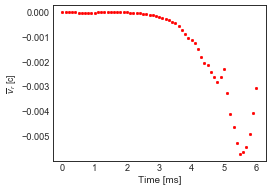

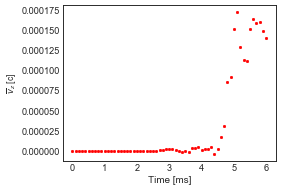

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


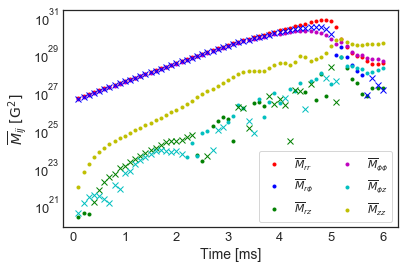

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


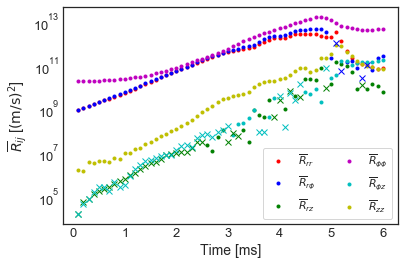

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


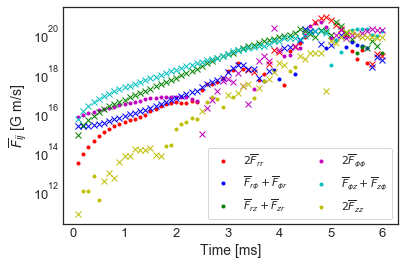

In [60]:
t = np.linspace(0,6,61)
bvaxes = ['$\overline{B}_r$ [G]','$\overline{B}_{\phi}$ [G]','$\overline{B}_z$ [G]','$\overline{v}_r$ [c]', '$\overline{v}_{\phi}$ [c]','$\overline{v}_z$ [c]']
Maxes = [['$\overline{M}_{rr}$','$\overline{M}_{r\phi}$','$\overline{M}_{rz}$'],['$\overline{M}_{\phi r}$','$\overline{M}_{\phi\phi}$','$\overline{M}_{\phi z}$'],['$\overline{M}_{z r}$','$\overline{M}_{z\phi}$','$\overline{M}_{z z}$']]
Raxes = [['$\overline{R}_{rr}$','$\overline{R}_{r\phi}$','$\overline{R}_{rz}$'],['$\overline{R}_{\phi r}$','$\overline{R}_{\phi\phi}$','$\overline{R}_{\phi z}$'],['$\overline{R}_{z r}$','$\overline{R}_{z\phi}$','$\overline{R}_{z z}$']]
Faxes = [['$\overline{F}_{rr}$','$\overline{F}_{r\phi}$','$\overline{F}_{rz}$'],['$\overline{F}_{\phi r}$','$\overline{F}_{\phi\phi}$','$\overline{F}_{\phi z}$'],['$\overline{F}_{z r}$','$\overline{F}_{z\phi}$','$\overline{F}_{z z}$']]
bmean_t = np.zeros((61,3))
vmean_t = np.zeros((61,3))
Mmean_t = np.zeros((61,3,3))
Rmean_t = np.zeros((61,3,3))
Fmean_t = np.zeros((61,3,3))
text_save_bv = ['Br','Bphi','Bz','vr','vphi','vz'] 
text_save_M = [['M_11','M_12','M_13'],['M_21','M_22','M_23'],['M_31','M_32','M_33']]
text_save_R = [['R_11','R_12','R_13'],['R_21','R_22','R_23'],['R_31','R_32','R_33']]
text_save_F = [['F_11','F_12','F_13'],['F_21','F_22','F_23'],['F_31','F_32','F_33']]
for x in range(0,61):
    arx = format(10*x, "03")
    varlist = read_data(arx)
    mean_variables = averaging(arx)
    bvmean = mean_variables[0]
    bmean_t[x] = (bvmean[0],bvmean[1],bvmean[2])
    vmean_t[x] = (bvmean[3],bvmean[4],bvmean[5])
    Mmean = mean_variables[1]
    Mmean_t[x] = Mmean
    Rmean = mean_variables[2]
    Rmean_t[x] = Rmean
    Fmean = mean_variables[3]
    Fmean_t[x] = Fmean
for x in range(0,3):
    fig = plt.figure(figsize=(5,3.75),dpi=55)
    plt.plot(t,bmean_t[:,x],linestyle = 'None', marker = '.', color = 'g')
    plt.xlabel('Time [ms]', fontsize = '13')
    plt.ylabel(bvaxes[x], fontsize = '11')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig('Simulation/Plots/'+text_save_bv[x]+'.eps',bbox_inches = 'tight')
    plt.show()
    fig = plt.figure(figsize=(5,3.75),dpi=55)
    plt.plot(t,vmean_t[:,x],linestyle = 'None', marker = '.', color = 'r')
    plt.xlabel('Time [ms]', fontsize = '13')
    plt.ylabel(bvaxes[3+x], fontsize = '11')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig('Simulation/Plots/'+text_save_bv[3+x]+'.eps',bbox_inches = 'tight')
    plt.show()


t_plot = np.delete(t,0)
Mmean_tplot = np.zeros((60,3,3))
Rmean_tplot = np.zeros((60,3,3))
Fmean_tplot = np.zeros((60,3,3))
for x in range(0,3):
    for y in range(0,3):
        Mmean_tplot[:,x,y] = np.delete(Mmean_t[:,x,y],0)
        Rmean_tplot[:,x,y] = np.delete(Rmean_t[:,x,y],0)
        Fmean_tplot[:,x,y] = np.delete(Fmean_t[:,x,y],0)

fig, ax = plt.subplots()
ax.plot(t_plot,Mmean_tplot[:,0,0],linestyle='None', marker='.', color ='r',label = r'$\overline{M}_{rr}$')
ax.plot(t_plot,Mmean_tplot[:,0,1],linestyle='None', marker='.', color ='b',label = r'$\overline{M}_{r\phi}$')
ax.plot(t_plot,Mmean_tplot[:,0,2],linestyle='None', marker='.', color ='g',label = r'$\overline{M}_{rz}$')
ax.plot(t_plot,Mmean_tplot[:,1,1],linestyle='None', marker='.', color ='m',label = r'$\overline{M}_{\phi \phi}$')
ax.plot(t_plot,Mmean_tplot[:,1,2],linestyle='None', marker='.', color ='c',label = r'$\overline{M}_{\phi z}$')
ax.plot(t_plot,Mmean_tplot[:,2,2],linestyle='None', marker='.', color ='y',label = r'$\overline{M}_{zz}$')
ax.plot(t_plot,-Mmean_tplot[:,0,0],linestyle='None', marker='x', color ='r')
ax.plot(t_plot,-Mmean_tplot[:,0,1],linestyle='None', marker='x', color ='b')
ax.plot(t_plot,-Mmean_tplot[:,0,2],linestyle='None', marker='x', color ='g')
ax.plot(t_plot,-Mmean_tplot[:,1,1],linestyle='None', marker='x', color ='m')
ax.plot(t_plot,-Mmean_tplot[:,1,2],linestyle='None', marker='x', color ='c')
ax.plot(t_plot,-Mmean_tplot[:,2,2],linestyle='None', marker='x', color ='y')
plt.yscale("log")
plt.xlabel('Time [ms]',fontsize = '14')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(r'$\overline{M}_{ij}$ $\rm{[G^2]}$', fontsize = '14')
leg = ax.legend(loc = 'lower right', ncol = 2, frameon = 'True',prop={"size":11})

plt.savefig('Simulation/Plots/Mmean.eps',bbox_inches ='tight')        
plt.show()

fig, ax = plt.subplots()
ax.plot(t_plot,Rmean_tplot[:,0,0],linestyle='None', marker='.', color ='r',label = r'$\overline{R}_{rr}$')
ax.plot(t_plot,Rmean_tplot[:,0,1],linestyle='None', marker='.', color ='b',label = r'$\overline{R}_{r\phi}$')
ax.plot(t_plot,Rmean_tplot[:,0,2],linestyle='None', marker='.', color ='g',label = r'$\overline{R}_{rz}$')
ax.plot(t_plot,Rmean_tplot[:,1,1],linestyle='None', marker='.', color ='m',label = r'$\overline{R}_{\phi \phi}$')
ax.plot(t_plot,Rmean_tplot[:,1,2],linestyle='None', marker='.', color ='c',label = r'$\overline{R}_{\phi z}$')
ax.plot(t_plot,Rmean_tplot[:,2,2],linestyle='None', marker='.', color ='y',label = r'$\overline{R}_{zz}$')
ax.plot(t_plot,-Rmean_tplot[:,0,0],linestyle='None', marker='x', color ='r')
ax.plot(t_plot,-Rmean_tplot[:,0,1],linestyle='None', marker='x', color ='b')
ax.plot(t_plot,-Rmean_tplot[:,0,2],linestyle='None', marker='x', color ='g')
ax.plot(t_plot,-Rmean_tplot[:,1,1],linestyle='None', marker='x', color ='m')
ax.plot(t_plot,-Rmean_tplot[:,1,2],linestyle='None', marker='x', color ='c')
ax.plot(t_plot,-Rmean_tplot[:,2,2],linestyle='None', marker='x', color ='y')
plt.yscale("log")
plt.xlabel('Time [ms]', fontsize = '14')
plt.ylabel(r'$\overline{R}_{ij}$ [$\rm{(m/s)^2}$]', fontsize = '14')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = ax.legend(loc = 'lower right', ncol = 2, frameon = 'True',prop={"size":11})
plt.savefig('Simulation/Plots/Rmean.eps',bbox_inches='tight')
plt.show() 

fig, ax = plt.subplots()
ax.plot(t_plot,2*Fmean_tplot[:,0,0],linestyle='None', marker='.', color ='r', label = r'$2\overline{F}_{rr}$')
ax.plot(t_plot,Fmean_tplot[:,1,0]+Fmean_tplot[:,0,1],linestyle='None', marker='.', color ='b', label = r'$\overline{F}_{r\phi}+\overline{F}_{\phi r}$')
ax.plot(t_plot,Fmean_tplot[:,2,0]+Fmean_tplot[:,0,2],linestyle='None', marker='.', color ='g', label = r'$\overline{F}_{rz}+\overline{F}_{zr}$')
ax.plot(t_plot,2*Fmean_tplot[:,1,1],linestyle='None', marker='.', color ='m', label = r'$2\overline{F}_{\phi\phi}$' )
ax.plot(t_plot,Fmean_tplot[:,2,1]+Fmean_tplot[:,1,2],linestyle='None', marker='.', color ='c',label = r'$\overline{F}_{\phi z}+\overline{F}_{z\phi}$')
ax.plot(t_plot,2*Fmean_tplot[:,2,2],linestyle='None', marker='.', color ='y', label = r'$2\overline{F}_{zz}$')
ax.plot(t_plot,-2*Fmean_tplot[:,0,0],linestyle='None', marker='x', color ='r')
ax.plot(t_plot,-(Fmean_tplot[:,1,0]+Fmean_tplot[:,0,1]),linestyle='None', marker='x', color ='b')
ax.plot(t_plot,-(Fmean_tplot[:,2,0]+Fmean_tplot[:,0,2]),linestyle='None', marker='x', color ='g')
ax.plot(t_plot,-2*Fmean_tplot[:,1,1],linestyle='None', marker='x', color ='m')
ax.plot(t_plot,-(Fmean_tplot[:,2,1]+Fmean_tplot[:,1,2]),linestyle='None', marker='x', color ='c')
ax.plot(t_plot,-2*Fmean_tplot[:,2,2],linestyle='None', marker='x', color ='y')

plt.yscale("log")
plt.xlabel('Time [ms]', fontsize = '14')
plt.ylabel(r'$\overline{F}_{ij}$ [G m/s]',fontsize = '14')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = ax.legend(loc = 'lower right', ncol = 2, frameon = 'True',prop={"size":11})

plt.savefig('Simulation/Plots/Fmean.eps',bbox_inches='tight')
plt.show()
    

## REPRESENTACIÓ GRÀFICA DE ALPHA##

DATA FROM FILE:       000
time                     =  [0.]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent mat

/Users/miquelmiravet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:178: RuntimeWarning: invalid value encountered in double_scalars


Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 29767740015990.26  G
ratio turb/mean Br: -40.51034867468221
max turbulent Bphi: 28406140523614.836  G
ratio Bphi        : 32.528103137437576
max turbulent Bz  : 523985194508.3281  G
ratio Bz          : 0.011390876908060352
max turbulent vr  : 45109.30546451439  m/s
ratio vr          : -0.40917509914168293
max turbulent vphi: 273065.55935251235  m/s
ratio vphi        : 9.660405871385771e-05
max turbulent vz  : 5893.504966498861  m/s
ratio vz          : -35627.386190847916
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TE

Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.34836559e+11  1.54397884e+12  4.60221235e+13 -1.54364893e-05
  9.42917198e-02  1.04276162e-10  2.47636757e+13  1.72344397e+32]
Alpha coefficient: 63830.883094362995 5849.14426303252 32.890908602186485
DATA FROM FILE:       060
time                     =  [0.0006]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  10

TIME:  [-7.34803831e+11  2.04719640e+12  4.60602608e+13 -1.78830395e-05
  9.42973929e-02  5.23002654e-10  2.47635996e+13  1.72343701e+32]
Alpha coefficient: 150285.67426374496 11438.30190638091 31.87114884540759
DATA FROM FILE:       090
time                     =  [0.0009]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dim

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.34845169e+11  2.71802600e+12  4.61427377e+13 -1.23977827e-05
  9.43012329e-02  4.91465898e-09  2.47635095e+13  1.72342886e+32]
Alpha coefficient: 364823.1048214575 23843.347424932956 41.51547223945299
DATA 

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.34493086e+11  3.38697213e+12  4.62973941e+13 -5.48012864e-06
  9.42933441e-02  9.05475437e-09  2.47634618e+13  1.72342467e+32]
Alpha coefficient: 860796.2073751471 50998.470329972784 -48.17792905455386
DATA

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.33767168e+11  4.05738887e+12  4.66020844e+13 -1.28130307e-05
  9.42655831e-02  9.99171905e-09  2.47635417e+13  1.72343286e+32]
Alpha coefficient: 2027123.9128740602 108351.80951403965 10.817379448186816
DAT

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.33106718e+11  4.55307061e+12  4.70542079e+13 -3.77648202e-05
  9.42233278e-02 -1.60323145e-07  2.47638211e+13  1.72346088e+32]
Alpha coefficient: 3838845.6042750124 177864.83374788347 288.9324394600511
DATA FROM FILE:       240
time                     =  [0.0024]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dph

max turbulent Br  : 630975632326283.9  G
ratio turb/mean Br: -847.5842322282101
max turbulent Bphi: 563108910833144.4  G
ratio Bphi        : 108.8812868671915
max turbulent Bz  : 187165207592256.22  G
ratio Bz          : 3.8912766535365204
max turbulent vr  : 1108363.1214702383  m/s
ratio vr          : -0.34319126008159606
max turbulent vphi: 1090422.7628806783  m/s
ratio vphi        : 0.0003864938640678225
max turbulent vz  : 298149.1791457324  m/s
ratio vz          : 11.366325971243166
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensi

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.41183556e+11  5.69649751e+12  4.96099961e+13 -2.04810798e-04
  9.39210178e-02  2.78964038e-06  2.47664399e+13  1.72372598e+32]
Alpha coefficient: 16694308.760108551 562771.1700375169 -12657.95835607379
DATA

Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.04609324e+11  5.59019955e+12  5.24445279e+13 -3.25140548e-04
  9.35621856e-02 -1.83728273e-07  2.47699432e+13  1.72409846e+32]
Alpha coefficient: 28464140.066524815 936059.7248391213 -19543.788482860513
DATA FROM FILE:       340
time                     =  [0.0034]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-6.76414448e+11  5.89997775e+12  5.40529850e+13 -5.62348867e-04
  9.29436411e-02 -1.14797848e-06  2.47766496e+13  1.72491559e+32]
Alpha coefficient: 40796148.50066884 1620878.3228483803 -50234.93255956763
DATA FROM FILE:       370
time                     =  [0.0037]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 

Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 2637056833226725.5  G
ratio turb/mean Br: -3339.109501205763
max turbulent Bphi: 3127497372923180.0  G
ratio Bphi        : 6421.06247261574
max turbulent Bz  : 883720850373505.6  G
ratio Bz          : 14.739221716610645
max turbulent vr  : 3519527.5394582655  m/s
ratio vr          : -0.10310276437195981
max turbulent vphi: 4580021.031872358  m/s
rat

Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 3444997262990003.5  G
ratio turb/mean Br: -4646.943697261603
max turbulent Bphi: 2246187629090133.8  G
ratio Bphi        : -313.0934383728024
max turbulent Bz  : 1147637547761694.8  G
ratio Bz          : 17.586500683065083
max turbulent vr  : 4689591.519406184  m/s
ratio vr          : -0.08675038017991311
max turbulent vphi: 6505709.501572328  m/s
ratio vphi        : 0.0024213529040334387
max turbulent vz  : 1632600.6264668554  m/s
ratio vz          : 12.094093864492162
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.47778035e+11 -4.43067041e+13  7.82160217e+13 -2.39652748e-03
  8.70939209e-02  1.69653708e-05  2.49067674e+13  1.74271317e+32]
Alpha coefficient: 149905571.45861074 -1326159.5014485917 3737070.392538803
DATA FROM FILE:       470
time                     =  [0.0047]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz    

vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 547617082234555

Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 1538825533189093.2  G
ratio turb/mean Br: -2001.3860757994191
max turbulent Bphi: 1505859734184789.5  G
ratio Bphi        : -11.262052546765359
max turbulent Bz  : 1485481851801719.0  G
ratio Bz          : 15.072146950800873
max turbulent vr  : 1862282.5885484908  m/s
ratio vr          : -0.01176576156143338
max turbulent vphi: 4425916.970440369  m/s
ratio vphi        : 0.0017203543272234965
max turbulent vz  : 2438516.78572996  m/s
ratio vz          : 0.7326350316638973
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3,

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.18680909e+11 -1.57651654e+14  1.20363230e+14 -5.43409068e-03
  8.87555178e-02  1.58172464e-04  2.51111729e+13  1.80117746e+32]
Alpha coefficient: -229357857.1261427 -114385.44319308648 -94749.77322520233
DATA FROM FILE:       580
time                     =  [0.0058]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz   

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


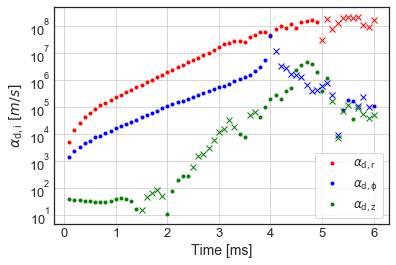

In [18]:
t = np.linspace(0,6,61)
alpha_t = np.zeros((61,3))
for x in range(0,61):
    arx = format(10*x, "03")
    alpha_var = fem(arx)
    alpha_t[x] = alpha_var[1]
t_plot = np.delete(t,0)
alpha_tr = np.delete(alpha_t[:,0],0)
alpha_tphi = np.delete(alpha_t[:,1],0) 
alpha_tz = np.delete(alpha_t[:,2],0)

fig, ax = plt.subplots()
ax.plot(t_plot,alpha_tr,linestyle='None', marker='.', color ='r',label = r'$\alpha_{\rm{d},r}$')
ax.plot(t_plot,alpha_tphi,linestyle='None', marker='.', color ='b',label = r'$\alpha_{\rm{d},\phi}$')
ax.plot(t_plot,alpha_tz,linestyle='None', marker='.', color ='g',label = r'$\alpha_{\rm{d},z}$')
ax.plot(t_plot,-alpha_tr,linestyle='None', marker='x', color ='r')
ax.plot(t_plot,-alpha_tphi,linestyle='None', marker='x', color ='b')
ax.plot(t_plot,-alpha_tz,linestyle='None', marker='x', color ='g')


plt.yscale('log')
plt.xlabel('Time [ms]', fontsize = '14')
plt.ylabel(r'$\alpha_{\rm{d},i} $ $[m/s]$', fontsize = '14')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
leg = ax.legend(loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig('Simulation/Plots/alfa_coef.eps',bbox_inches = 'tight')
plt.show()

DATA FROM FILE:       000
time                     =  [0.]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       000
time                     =  [0.]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                  

/Users/miquelmiravet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:178: RuntimeWarning: invalid value encountered in double_scalars


dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 29767740015990.26  G
ratio turb/mean Br: -40.51034867468221
max turbulent Bphi: 28406140523614.836  G
ratio Bphi        : 32.528103137437576
max turbulent Bz  : 523985194508.3281  G
ratio Bz          : 0.011390876908060352
max turbulent vr  : 45109.30546451439  m/s
ratio v

phi                      :  (100, 100, 34)
DATA FROM FILE:       040
time                     =  [0.0004]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
In

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       070
time                     =  [0.0007]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       070
time                     =  [0.0007]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       100
time                     =  [0.001]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas  

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       130
time                     =  [0.0013]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       160
time                     =  [0.0016]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       190
time                     =  [0.0019]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas 

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       220
time                     =  [0.0022]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       250
time                     =  [0.0025]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     

Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 722219583099538.0  G
ratio turb/mean Br: -972.4045321664025
max turbulent Bphi: 633477968944709.6  G
ratio Bphi        : 118.88885492269348
max turbulent Bz  : 224057604139767.94  G
ratio Bz          : 4.627813591871121
max turbulent vr  : 1243485.6329509914  m/s
ratio vr          : -0.30890848393027004
max turbulent vphi: 1211295.077624941  m/s
ratio vphi        : 0.0004295569962119941
max turbulent vz  : 280404.7980337339  m/s
ratio vz          : 7.6873344236506576
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in n

Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 1083975006566305.4  G
ratio turb/mean Br: -1476.4736327174353
max turbulent Bphi: 911450886684510.0  G
ratio Bphi        : 158.4290537976135
max turbulent Bz  : 316972428354943.3  G
ratio Bz          : 6.269736815415828
max turbulent vr  : 1688745.8799340543  m/s
ratio vr          : -0.23403042721994063
max turbulent vphi: 1429104.7392658424  m/s
ratio vphi        : 0.0005080843444937996
max turbulent vz  : 429177.9411582172  m/s
ratio vz          : 5.4141025636877025
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3,

Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 1613845146015595.2  G
ratio turb/mean Br: -2116.983827758408
max turbulent Bphi: 1290250557597906.0  G
ratio Bphi        : 229.64838081769182
max turbulent Bz  : 392189185553340.44  G
ratio Bz          : 7.329586451240133
max turbulent vr  : 2333577.2874559658  m/s
ratio vr          : -0.17198169284963563
max turbulent vphi: 2455701.7872669795  m/s
ratio vphi        : 0.0008790579168430014
max turbulent vz  : 525272.7989402103  m/s
ratio vz          : -33.28084908770598
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dime

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       390
time                     =  [0.0039]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     

Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       420
time                     =  [0.0042]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (10

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       450
time                     =  [0.0045]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       480
time                     =  [0.0048]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       480
time                     =  [0.0048]
nr x nphi x 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       510
time                     =  [0.0051]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       510
time                     =  [0.0051]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 

vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 1538825533189093.2  G
ratio turb/mean Br: -2001.3860757994191
max turbulent Bphi: 1505859734184789.5 

Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 802581640079980.5  G
ratio turb/mean Br: -1116.7426733487973
max turbulent Bphi: 758048085975577.0  G
ratio Bphi        : -4.808373813977242
max turbulent Bz  : 1194132348345856.8  G
ratio Bz          : 9.921072604766833
max turbulent vr  : 1889934.8496270431  m/s
ratio vr          : -0.011601102105624867
max turbulent vphi: 3316420.8615752985  m/s
ratio vphi        : 0.0012463889017659143
max turbulent vz  : 1305029.116791537  m/s
ratio vz          : 0.27521279396519843
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses 

Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 918543066646955.0  G
ratio turb/mean Br: -1215.5533905730326
max turbulent Bphi: 696430045782022.8  G
ratio Bphi        : -4.197265861912097
max turbulent Bz  : 1080160962630880.5  G
ratio Bz          : 7.393210331766719
max turbulent vr  : 1419244.3436724679  m/s
ratio vr          : -0.015477318710012095
max turbulent vphi: 3429780.9742456963  m/s
ratio vphi        : 0.0012750920382664825
max turbulent vz  : 905204.633177788  m/s
ratio vz          : 0.2151236162391172
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


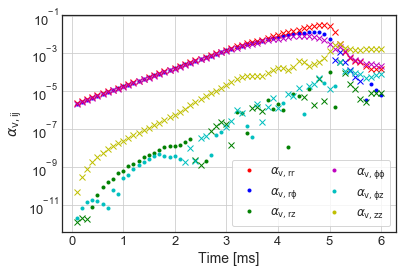

In [17]:
t = np.linspace(0,6,61)
alphavisc_t = np.zeros((61,3,3))
for x in range(0,61):
    arx = format(10*x, "03")
    alphav_var = alpha_visc(arx)
    alphavisc_t[x] = alphav_var
t_plot = np.delete(t,0)
alphav_t00 = np.delete(alphavisc_t[:,0,0],0)
alphav_t01 = np.delete(alphavisc_t[:,0,1],0) 
alphav_t02 = np.delete(alphavisc_t[:,0,2],0)
alphav_t11 = np.delete(alphavisc_t[:,1,1],0)
alphav_t12 = np.delete(alphavisc_t[:,1,2],0)
alphav_t22 = np.delete(alphavisc_t[:,2,2],0)


fig, ax = plt.subplots()
ax.plot(t_plot,alphav_t00,linestyle='None', marker='.', color ='r',label = r'${\alpha}_{\rm{v},rr}$')
ax.plot(t_plot,alphav_t01,linestyle='None', marker='.', color ='b',label = r'${\alpha}_{\rm{v},r\phi}$')
ax.plot(t_plot,alphav_t02,linestyle='None', marker='.', color ='g',label = r'${\alpha}_{\rm{v},rz}$')
ax.plot(t_plot,alphav_t11,linestyle='None', marker='.', color ='m',label = r'${\alpha}_{\rm{v},\phi \phi}$')
ax.plot(t_plot,alphav_t12,linestyle='None', marker='.', color ='c',label = r'${\alpha}_{\rm{v},\phi z}$')
ax.plot(t_plot,alphav_t22,linestyle='None', marker='.', color ='y',label = r'${\alpha}_{\rm{v},zz}$')
ax.plot(t_plot,-alphav_t00,linestyle='None', marker='x', color ='r')
ax.plot(t_plot,-alphav_t01,linestyle='None', marker='x', color ='b')
ax.plot(t_plot,-alphav_t02,linestyle='None', marker='x', color ='g')
ax.plot(t_plot,-alphav_t11,linestyle='None', marker='x', color ='m')
ax.plot(t_plot,-alphav_t12,linestyle='None', marker='x', color ='c')
ax.plot(t_plot,-alphav_t22,linestyle='None', marker='x', color ='y')

plt.yscale('log')
plt.xlabel('Time [ms]', fontsize ='14')
plt.ylabel(r'$\alpha_{\rm{v},ij} $', fontsize = '14')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
leg = ax.legend(loc = 'lower right', ncol = 2, frameon = 'True',prop={"size":12})
plt.savefig('Simulation/Plots/alfa_visc2.eps',bbox_inches = 'tight')
plt.show()

In [17]:
xi_alpha_file('alpha_dynamo')

DATA FROM FILE:       000
time                     =  [0.]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent mat

/Users/miquelmiravet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:176: RuntimeWarning: invalid value encountered in double_scalars


Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 29767740015990.26  G
ratio turb/mean Br: -40.51034867468221
max turbulent Bphi: 28406140523614.836  G
ratio Bphi        : 32.528103137437576
max turbulent Bz  : 523985194508.3281  G
ratio Bz          : 0.011390876908060352
max turbulent vr  : 45109.30546451439  m/s
ratio vr          : -0.40917509914168293
max turbulent vphi: 273065.55935251235  m/s
ratio vphi        : 9.660405871385771e-05
max turbulent vz  : 5893.504966498861  m/s
ratio vz          : -35627.386190847916


Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 48905957097649.625  G
ratio turb/mean Br: -66.55351658617542
max turbulent Bphi: 46286298897272.83  G
ratio Bphi        : 29.978583711215816
max turbulent Bz  : 4041362303013.5703  G
ratio Bz          : 0.08781346874690808
max turbulent vr  : 69077.61063182035  m/s
ratio vr          : -0.1492684657918018
max turbulent vphi: 293944.41544490337  m/s
ratio vphi        : 0.00010398506170782232
max turbulent vz  : 9852.567664594191  m/s
ratio vz          : 3151.6913863946293
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tens

Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 68617844622517.695  G
ratio turb/mean Br: -93.3825352719695
max turbulent Bphi: 68683744096943.97  G
ratio Bphi        : 33.550148920414976
max turbulent Bz  : 7422492366396.648  G
ratio Bz          : 0.16114742367622437
max turbulent vr  : 99728.74079863925  m/s
ratio vr          : -0.18601942494541404
max turbulent vphi: 320021.4309441519  m/s
ratio vphi        : 0.00011320319232500494
max turbulent vz  : 12432.25539610404  m/s
ratio vz          : 792.9126153964178
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in n

Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 96040808248229.47  G
ratio turb/mean Br: -130.6863804507697
max turbulent Bphi: 98714173509870.95  G
ratio Bphi        : 38.705753136271234
max turbulent Bz  : 11039872965688.562  G
ratio Bz          : 0.2393865238306753
max turbulent vr  : 152135.24205726516  m/s
ratio vr          : -0.35230146644433075
max turbulent vphi: 354441.32094866276  m/s
ratio vphi        : 0.00012537386430066212
max turbulent vz  : 18776.570189525235  m/s
ratio vz          : 320.3492539538759
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.34825455e+11  3.05266274e+12  4.62073767e+13 -2.47447240e+05
  2.82701969e+09  2.71298339e+02  2.47634771e+13  1.72342596e+32]
Alpha coefficient: 561424.7443266317 34507.05736462023 17.691245885627655
DATA FROM FILE:       150
time                     =  [0.0015]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 1

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.34434447e+11  3.72200759e+12  4.64241404e+13 -1.86418493e+05
  2.82652053e+09  2.43929216e+02  2.47634732e+13  1.72342597e+32]
Alpha coefficient: 1319388.8002779507 74884.85848294183 -84.76772954781235
DATA FROM FILE:       190
time                     =  [0.0019]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.33933394e+11  4.39152112e+12  4.68674035e+13 -8.11915525e+05
  2.82524931e+09 -1.79852726e+03  2.47636957e+13  1.72344832e+32]
Alpha coefficient: 3101693.265261849 153690.22862014637 210.24296519847647
DATA FROM FILE:       230
time                     =  [0.0023]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz     

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.37898209e+11  5.03435797e+12  4.77991868e+13 -2.56149188e+06
  2.82247235e+09  1.32892649e+04  2.47645504e+13  1.72353413e+32]
Alpha coefficient: 7038947.599746849 283812.2870778612 -1623.1136458138537
DATA FROM FILE:       270
time                     =  [0.0027]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.31663685e+11  5.50174249e+12  4.88275432e+13 -4.99969261e+06
  2.81804146e+09  5.34237794e+04  2.47659022e+13  1.72366968e+32]
Alpha coefficient: 12886283.946871752 480745.5775445816 -6074.717427895066
DATA FROM FILE:       300
time                     =  [0.003]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 1

Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100,

vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 2009831204126596.2  G
ratio turb/mean Br: -2626.0623939359316
max turbulent Bphi: 1860439654361185.5 

Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 2934590296650588.5  G
ratio turb/mean Br: -4018.611618851765
max turbulent Bphi: 2243931149576685.8  G
ratio Bphi        : -916.3254439553565
max turbulent Bz  : 924314523033469.9  G
rati

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.45980293e+11 -1.46474837e+13  6.71713649e+13 -6.15479493e+07
  2.66320327e+09 -1.03035447e+05  2.48467447e+13  1.73466012e+32]
Alpha coefficient: 121384478.174737 -1751684.9879441806 531650.5984662636
DATA FROM FILE:       450
time                     =  [0.0045]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 1

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.55235908e+11 -8.87777713e+13  8.64526594e+13 -8.41881042e+07
  2.56487714e+09  2.56645373e+06  2.49740277e+13  1.75340098e+32]
Alpha coefficient: 176452593.18070614 -415133.46691031434 4209791.680131673
DAT

Stresses shape: (3, 3, 3, 100, 100, 34)
dV matrix shape: (100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.54609630e+11 -1.28715845e+14  1.35254971e+14 -1.23104493e+08
  2.54525901e+09  3.85955506e+06  2.50881297e+13  1.79125690e+32]
Alpha coefficient: -82706095.66465572 -285683.2909234844 -171703.68094470524
DATA FROM FILE:       530
time                     =  [0.0053]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) = 

TIME:  [-7.60314869e+11 -1.50448872e+14  8.67548892e+13 -1.69560435e+08
  2.63187314e+09  4.88546432e+06  2.51101264e+13  1.80045552e+32]
Alpha coefficient: -203917901.3442423 166415.45763837788 37338.1097377052
DATA FROM FILE:       570
time                     =  [0.0057]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 10.0  m
dphi = 0.0006666459610917552  rads
dz   = 9.803529411764703  m
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dim

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
TIME:  [-7.55658348e+11 -1.65924692e+14  1.46101749e+14 -9.16983342e+07
  2.68983012e+09  4.20783477e+06  2.51137493e+13  1.80281750e+32]
Alpha coefficient: -176064363.07390648 117381.33360263085 -50758.43703185472


()

In [54]:
alpha_visc_file('alpha_viscosity')

DATA FROM FILE:       000
time                     =  [0.]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       000
time                     =  [0.]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                  

/Users/miquelmiravet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in double_scalars


 (100, 100, 34)
DATA FROM FILE:       010
time                     =  [0.0001]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 1000.0  cm
dphi = 0.0006666459610917552  rads
dz   = 980.3529411764703  cm
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100

DATA FROM FILE:       040
time                     =  [0.0004]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       040
time                     =  [0.0004]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas          

vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       070
time                     =  [0.0007]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 1000.0  cm
dphi = 0.0006666459610917552  rads
dz   = 980.3529411764703  cm
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dim

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       100
time                     =  [0.001]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       100
time                     =  [0.001]
nr x nphi x nz

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       130
time                     =  [0.0013]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       130
time                     =  [0.0013]
nr x nphi x 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       160
time                     =  [0.0016]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas 

DATA FROM FILE:       190
time                     =  [0.0019]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       190
time                     =  [0.0019]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas          

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       220
time                     =  [0.0022]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       220
time                     =  [0.0022]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       250
time                     =  [0.0025]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       250
time                     =  [0.0025]
nr x nphi x 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       280
time                     =  [0.0028]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       280
time                     =  [0.0028]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       310
time                     =  [0.0031]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       310
time                     =  [0.0031]
nr x nphi x 

nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       340
time                     =  [0.0034]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 

vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
dr   = 1000.0  cm
dphi = 0.0006666459610917552  rads
dz   = 980.3529411764703  cm
Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 20098312041

Volume element dim: (100, 100, 34)
Volume: 0.34441996921421086 km3
Volume check: 0.3 km3
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Integrand dimension: (100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
Turbulent matrix shape: (6, 100, 100, 34)
max turbulent Br  : 2637056833226725.5  G
ratio turb/mean Br: -3339.109501205758
max turbulent Bphi: 3127497372923180.0  G
ratio Bphi        : 6421.06247261576
max turbulent Bz  : 883720850373505.6  G
ratio Bz          : 14.739221716610642
max turbulent vr  : 3519527.5394582655  m/s
ratio vr          : -0.1031027643719598
max turbulent vphi: 4580021.031872368  m/s
rati

max turbulent Bz  : 1605230605382423.8  G
ratio Bz          : 23.89754336129955
max turbulent vr  : 4081925.7302971007  m/s
ratio vr          : -0.06632106796692741
max turbulent vphi: 7514097.774182892  m/s
ratio vphi        : 0.0028214510872637097
max turbulent vz  : 2170076.026148821  m/s
ratio vz          : -21.061451043788853
Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor:

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       490
time                     =  [0.0049]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas 

Maxwell stress tensor : (3, 3, 100, 100, 34)
Reynolds stress tensor: (3, 3, 100, 100, 34)
Faraday stress tensor : (3, 3, 100, 100, 34)
STRESS TENSOR Nº           : 1
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       520
time                     =  [0.0052]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr         

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 2
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       550
time                     =  [0.0055]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
STRESS TENSOR Nº           : 3
Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)
DATA FROM FILE:       580
time                     =  [0.0058]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       580
time                     =  [0.0058]
nr x nphi x 

Summation in nz. Dimensions: (3, 3, 100, 100)
Summation in nphi. Dimensions: (3, 3, 100)
Summation in nr. Dimensions: (3, 3)
Mean Maxwell stress tensor : (3, 3)
Mean Reynolds stress tensor: (3, 3)
Mean Faraday stress tensor : (3, 3)


()

DATA FROM FILE:       000
time                     =  [0.]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       010
time                     =  [0.0001]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas              

DATA FROM FILE:       160
time                     =  [0.0016]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       170
time                     =  [0.0017]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas          

DATA FROM FILE:       320
time                     =  [0.0032]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       330
time                     =  [0.0033]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas          

DATA FROM FILE:       480
time                     =  [0.0048]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
DATA FROM FILE:       490
time                     =  [0.0049]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas          

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


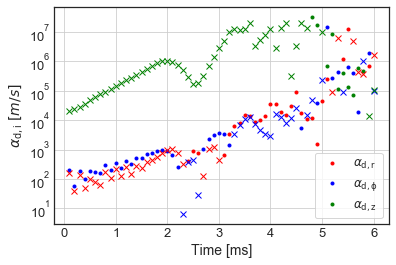

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


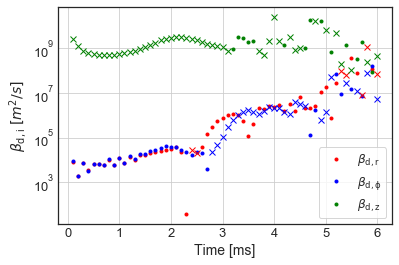

In [16]:
t = np.linspace(0,6,61)
alpha_t = np.zeros((61,3))
beta_t = np.zeros((61,3))
for x in range(0,61):
    arx = format(10*x, "03")
    dynamo_var = alpha_beta_dyn(arx,3)
    alpha_t[x] = dynamo_var[0]
    beta_t[x] = dynamo_var[1]
t_plot = np.delete(t,0)
alpha_tr = np.delete(alpha_t[:,0],0)
alpha_tphi = np.delete(alpha_t[:,1],0) 
alpha_tz = np.delete(alpha_t[:,2],0)
beta_tr = np.delete(beta_t[:,0],0)
beta_tphi = np.delete(beta_t[:,1],0) 
beta_tz = np.delete(beta_t[:,2],0)

fig, ax = plt.subplots()
ax.plot(t_plot,alpha_tr,linestyle='None', marker='.', color ='r',label = r'$\alpha_{\rm{d},r}$')
ax.plot(t_plot,alpha_tphi,linestyle='None', marker='.', color ='b',label = r'$\alpha_{\rm{d},\phi}$')
ax.plot(t_plot,alpha_tz,linestyle='None', marker='.', color ='g',label = r'$\alpha_{\rm{d},z}$')
ax.plot(t_plot,-alpha_tr,linestyle='None', marker='x', color ='r')
ax.plot(t_plot,-alpha_tphi,linestyle='None', marker='x', color ='b')
ax.plot(t_plot,-alpha_tz,linestyle='None', marker='x', color ='g')
plt.yscale('log')
plt.xlabel('Time [ms]', fontsize = '14')
plt.ylabel(r'$\alpha_{\rm{d},i}$ $[m/s]$', fontsize = '14')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
leg = ax.legend(loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig('Simulation/Plots/alfa_coef2prova.eps',bbox_inches = 'tight')
plt.show()

fig, ax = plt.subplots()
ax.plot(t_plot,beta_tr,linestyle='None', marker='.', color ='r',label = r'$\beta_{\rm{d},r}$')
ax.plot(t_plot,beta_tphi,linestyle='None', marker='.', color ='b',label = r'$\beta_{\rm{d},\phi}$')
ax.plot(t_plot,beta_tz,linestyle='None', marker='.', color ='g',label = r'$\beta_{\rm{d},z}$')
ax.plot(t_plot,-beta_tr,linestyle='None', marker='x', color ='r')
ax.plot(t_plot,-beta_tphi,linestyle='None', marker='x', color ='b')
ax.plot(t_plot,-beta_tz,linestyle='None', marker='x', color ='g')
plt.yscale('log')
plt.xlabel('Time [ms]', fontsize = '14')
plt.ylabel(r'$\beta_{\rm{d},i} $ $[m^2/s]$', fontsize = '14')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
#leg = ax.legend(bbox_to_anchor= (1.2,0.32), frameon = 'True', prop={"size":12})
leg = ax.legend(loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig('Simulation/Plots/beta_coefprova.eps',bbox_inches = 'tight')
plt.show()

In [228]:
n=6
A=np.zeros((n,n))
for i in np.arange(n):
    for j in np.arange(n):
        A[i,j] = 10*i+j
print ("==== original grid ===")
print (A)
print ("first row    : ", A[0,:])
print ("first column : ", A[:,0])

print ("==== reshaped grid ===")
Anew=np.reshape(A,(2,3,2,3))

print("upper left :\n", Anew[0,:,0,:])
print("upper right :\n", Anew[0,:,1,:])
print("lower left :\n", Anew[1,:,0,:])
print("lower right :\n", Anew[1,:,1,:])

==== original grid ===
[[ 0.  1.  2.  3.  4.  5.]
 [10. 11. 12. 13. 14. 15.]
 [20. 21. 22. 23. 24. 25.]
 [30. 31. 32. 33. 34. 35.]
 [40. 41. 42. 43. 44. 45.]
 [50. 51. 52. 53. 54. 55.]]
first row    :  [0. 1. 2. 3. 4. 5.]
first column :  [ 0. 10. 20. 30. 40. 50.]
==== reshaped grid ===
upper left :
 [[ 0.  1.  2.]
 [10. 11. 12.]
 [20. 21. 22.]]
upper right :
 [[ 3.  4.  5.]
 [13. 14. 15.]
 [23. 24. 25.]]
lower left :
 [[30. 31. 32.]
 [40. 41. 42.]
 [50. 51. 52.]]
lower right :
 [[33. 34. 35.]
 [43. 44. 45.]
 [53. 54. 55.]]


In [ ]:
#test amb camp magnetic analitic: 


def alpha_beta_dyn(arxiu,n): 
   
    m = n+1
    listvar = read_data(arxiu)
    r = listvar[1]
    phi = listvar[2]
    z = listvar[3]

    r = splitting(r,n)
    r = np.array(r)*10**(-2)
    phi = splitting(phi,n)
    phi = np.array(phi)
    z = splitting(z,m)
    z = np.array(z)*10**(-2)

    r_split = r.reshape(n,int(len(r)/n))
    phi_split = phi.reshape(n,int(len(phi)/n))
    z_split = z.reshape(m,int(len(z)/m))
    
    Bvnew = np.zeros((2,3,len(r),len(phi),len(z)))
    B = [listvar[]]
    print("B shape    :", B.shape)
    v = [listvar[7],listvar[8],listvar[9]]
    v = np.array(v)*10**(-2)
    
    for x in range(0,3):
        for i in range(0,len(r)):
            for j in range(0,len(phi)):
                Bvnew[0,x,i,j,:] = splitting(B[x,i,j,:],m)
                Bvnew[1,x,i,j,:] = splitting(v[x,i,j,:],m)
            for k in range(0,len(z)):
                Bvnew[0,x,i,:,k] = splitting(B[x,i,:,k],n)
                Bvnew[1,x,i,:,k] = splitting(v[x,i,:,k],n)
        for j in range(0,len(phi)):
            for k in range(0,len(z)):
                Bvnew[0,x,:,j,k] = splitting(B[x,:,j,k],n)
                Bvnew[1,x,:,j,k] = splitting(v[x,:,j,k],n)
    
    Br = Bvnew[0,0]
    Bphi = Bvnew[0,1]
    Bz= Bvnew[0,2]
    vr = Bvnew[1,0]
    vphi = Bvnew[1,1]
    vz= Bvnew[1,2]

    Bvr_split = Bvnew[:,0].reshape(2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m))
    Bvphi_split = Bvnew[:,1].reshape(2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m))
    Bvz_split = Bvnew[:,2].reshape(2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m))
                   
    dr = (r[1]-r[0])*10**(-2)
    dphi = phi[1]-phi[0]
    dz = (z[1]-z[0])*10**(-2)
    
    Bvmean_r = np.zeros((2,n,n,m))
    Bvmean_phi = np.zeros((2,n,n,m))
    Bvmean_z = np.zeros((2,n,n,m))

    dVmatrix = np.ones((n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    integrandBvr = np.zeros((2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    integrandBvphi = np.zeros((2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    integrandBvz = np.zeros((2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    for y in range(0,2):
        for i in range(0,n):
            for j in range(0,n):
                for k in range(0,m):
                    dV = r_split[i]*dr*dphi*dz*10**(-2)
                    for x in range(0,int(len(r)/n)):
                        dVmatrix[i,x,j,:,k,:] = dV[x]*dVmatrix[i,x,j,:,k,:]            
                
                    integrandBvr[y,i,:,j,:,k,:] = dVmatrix[i,:,j,:,k,:]*Bvr_split[y,i,:,j,:,k,:]
                    integrandBvphi[y,i,:,j,:,k,:] = dVmatrix[i,:,j,:,k,:]*Bvphi_split[y,i,:,j,:,k,:]
                    integrandBvz[y,i,:,j,:,k,:] = dVmatrix[i,:,j,:,k,:]*Bvz_split[y,i,:,j,:,k,:]
                
                    V = np.sum(dVmatrix[i,:,j,:,k,:])
                    
                    Bvmean_r[y,i,j,k] = np.sum(integrandBvr[y,i,:,j,:,k,:])/V
                    Bvmean_phi[y,i,j,k] = np.sum(integrandBvphi[y,i,:,j,:,k,:])/V
                    Bvmean_z[y,i,j,k] = np.sum(integrandBvz[y,i,:,j,:,k,:])/V
    
    turbr = np.zeros((2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    turbphi = np.zeros((2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    turbz = np.zeros((2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    for x in range(0,2):
        for i in range(0,n):
            for j in range(0,n):
                for k in range(0,m):
                    turbr[x,i,:,j,:,k,:] = Bvr_split[x,i,:,j,:,k,:]-Bvmean_r[x,i,j,k]
                    turbphi[x,i,:,j,:,k,:] = Bvphi_split[x,i,:,j,:,k,:]-Bvmean_phi[x,i,j,k]
                    turbz[x,i,:,j,:,k,:] = Bvz_split[x,i,:,j,:,k,:]-Bvmean_z[x,i,j,k]
                    
    turb = np.zeros((3,2,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    turb[0] = turbr
    turb[1] = turbphi
    turb[2] = turbz
    Bturb = turb[:,0]
    vturb = turb[:,1]

    F = np.zeros((3,3,n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    
    for p in range(0,3):
        for q in range(0,3):
            for i in range(0,n):
                for j in range(0,n):
                    for k in range(0,m):
                        F[p,q,i,:,j,:,k,:] = Bturb[p,i,:,j,:,k,:]*vturb[q,i,:,j,:,k,:]
                        
    Fmean = np.zeros((3,3,n,n,m))
    
    for p in range(0,3):
        for q in range(0,3):
            for i in range(0,n): 
                for j in range(0,n):
                    for k in range(0,m):
                        Fmean[p,q,i,j,k] = np.sum(dVmatrix[i,:,j,:,k,:]*F[p,q,i,:,j,:,k,:])/V        

    # fem: 
    fem = np.zeros((3,n,n,m))
    fem[0] = Fmean[2,1]-Fmean[1,2]
    fem[1] =  Fmean[0,2]-Fmean[2,0]
    fem[2] =  Fmean[1,0]-Fmean[0,1]
    fem1 = [fem[0,1,1,1],fem[1,1,1,1],fem[2,1,1,1]]
    fem1 = np.array(fem1)
    fem2 = [fem[0,1,1,2],fem[1,1,1,2],fem[2,1,1,2]]
    fem2 = np.array(fem2)

    #derivatives:
    dBrdr = np.zeros((n,m))
    dBrdphi = np.zeros((n,m))
    dBrdz1 = np.zeros((n,n))
    dBrdz2 = np.zeros((n,n))
    dBphidr = np.zeros((n,m))
    dBphidphi = np.zeros((n,m))
    dBphidz1 = np.zeros((n,n))
    dBphidz2 = np.zeros((n,n))
    dBzdr = np.zeros((n,m))
    dBzdphi = np.zeros((n,m))
    dBzdz1 = np.zeros((n,n))
    dBzdz2 = np.zeros((n,n))
    
    if n==3:
        for i in range(0,n):
            for j in range(0,m):
                dBrdr[i,j] = (Bvmean_r[0,2,i,j]-Bvmean_r[0,0,i,j])/(2*dr*int(len(r)/n))
                dBrdphi[i,j] = (Bvmean_r[0,i,2,j]-Bvmean_r[0,i,0,j])/(2*dphi*int(len(phi)/n))
                dBphidr[i,j] = (Bvmean_phi[0,2,i,j]-Bvmean_phi[0,0,i,j])/(2*dr*int(len(r)/n))
                dBphidphi[i,j] = (Bvmean_phi[0,i,2,j]-Bvmean_phi[0,i,0,j])/(2*dphi*int(len(phi)/n))
                dBzdr[i,j] = (Bvmean_z[0,2,i,j]-Bvmean_z[0,0,i,j])/(2*dr*int(len(r)/n))
                dBzdphi[i,j] = (Bvmean_z[0,i,2,j]-Bvmean_z[0,i,0,j])/(2*dphi*int(len(phi)/n))
            
        for i in range(0,n):
            for j in range(0,n): 
                dBrdz1[i,j] = (Bvmean_r[0,i,j,2]-Bvmean_r[0,i,j,0])/(2*dz*int(len(z)/m))
                dBrdz2[i,j] = (Bvmean_r[0,i,j,3]-Bvmean_r[0,i,j,1])/(2*dz*int(len(z)/m))
                dBphidz1[i,j] = (Bvmean_phi[0,i,j,2]-Bvmean_phi[0,i,j,0])/(2*dz*int(len(z)/m))
                dBphidz2[i,j] = (Bvmean_phi[0,i,j,3]-Bvmean_phi[0,i,j,1])/(2*dz*int(len(z)/m))
                dBzdz1[i,j] = (Bvmean_z[0,i,j,2]-Bvmean_z[0,i,j,0])/(2*dz*int(len(z)/m))
                dBzdz2[i,j] = (Bvmean_z[0,i,j,3]-Bvmean_z[0,i,j,1])/(2*dz*int(len(z)/m))
    else: 
        print('ERROR: n should be 3')

    #curl: 
    curl1 = np.zeros(3)
    curl1[0] = dBzdphi[1,1]-dBphidz1[1,1]
    curl1[2] = dBphidr[1,1]-dBrdphi[1,1]
    curl1[1] = dBrdz1[1,1]-dBzdr[1,1]
    
    curl2 = np.zeros(3)
    curl2[0] = dBzdphi[1,2]-dBphidz2[1,1]
    curl2[2] = dBphidr[1,2]-dBrdphi[1,2]
    curl2[1] = dBrdz2[1,1]-dBzdr[1,2]

    #bmean: 
    Bmean1 = np.zeros(3)
    Bmean1[0] = Bvmean_r[0,1,1,1]
    Bmean1[1] = Bvmean_phi[0,1,1,1]
    Bmean1[2] = Bvmean_z[0,1,1,1]
    
    Bmean2 = np.zeros(3)
    Bmean2[0] = Bvmean_r[0,1,1,2]
    Bmean2[1] = Bvmean_phi[0,1,1,2]
    Bmean2[2] = Bvmean_z[0,1,1,2]

    alpha_dyn = np.zeros((3))
    beta_dyn = np.zeros((3))
    
    for i in range(0,3):
        alpha_dyn[i] = (fem2[i]-fem1[i]*curl2[i]/curl1[i])/(Bmean2[i]-Bmean1[i]*curl2[i]/curl1[i])
        beta_dyn[i] = (alpha_dyn[i]*Bmean1[i]-fem1[i])/curl1[i]
    
    return alpha_dyn, beta_dyn

In [61]:
def prova_B(arxiu,n): 
   
    m = n+1
    listvar = read_data(arxiu)
    r = listvar[1]
    phi = listvar[2]
    z = listvar[3]

    r = splitting(r,n)
    r = np.array(r)*10**(-2)
    phi = splitting(phi,n)
    phi = np.array(phi)
    z = splitting(z,m)
    z = np.array(z)*10**(-2)

    r_split = r.reshape(n,int(len(r)/n))
    phi_split = phi.reshape(n,int(len(phi)/n))
    z_split = z.reshape(m,int(len(z)/m))
    
    Bvnew = np.zeros((2,3,len(r),len(phi),len(z)))
    B = np.zeros((3,int(len(r)),int(len(phi)),int(len(z))))
    curlB = np.zeros((3,int(len(r)),int(len(phi)),int(len(z))))
    rBphi = np.zeros((int(len(r)),int(len(phi)),int(len(z))))
    
    for i in range(0,int(len(r))):
        for j in range(0,int(len(phi))):
            for k in range(0,int(len(z))):
                B[0,i,j,k] = -np.sin(phi[j])/r[i]**(4)
                B[1,i,j,k] = 3*np.cos(phi[j])/r[i]**(4)
                B[2,i,j,k] = -np.sin(phi[j])/r[i]**(4)
                curlB[0,i,j,k] = -np.cos(phi[j])/r[i]**(5)
                curlB[1,i,j,k] = -4*np.sin(phi[j])/r[i]**(5)
                curlB[2,i,j,k] = -8*np.cos(phi[j])/r[i]**(5)
                
        rBphi[i,:,:] = r[i]*B[1,i,:,:]
        
    B_r = B[0].reshape(n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m))
    rB_phi = rBphi.reshape(n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m))
    B_phi = B[1].reshape(n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m))
    B_z = B[2].reshape(n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m))
    
    curlB_r = curlB[0].reshape(n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m))
    curlB_phi = curlB[1].reshape(n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m))
    curlB_z = curlB[2].reshape(n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m))
    
    dr = r[1]-r[0]
    dphi = phi[1]-phi[0]
    dz = z[1]-z[0]
    
    Bmean_r = np.zeros((n,n,m))
    rBphimean = np.zeros((n,n,m))
    Bmean_phi = np.zeros((n,n,m))
    Bmean_z = np.zeros((n,n,m))
    curlBmean_r = np.zeros((n,n,m))
    curlBmean_phi = np.zeros((n,n,m))
    curlBmean_z = np.zeros((n,n,m))

    dVmatrix = np.ones((n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    integrandBr = np.zeros((n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    integrandrBphi = np.zeros((n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    integrandBphi = np.zeros((n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    integrandBz = np.zeros((n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    integrandcurlBr = np.zeros((n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    integrandcurlBphi = np.zeros((n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    integrandcurlBz = np.zeros((n,int(len(r)/n),n,int(len(phi)/n),m,int(len(z)/m)))
    
    for i in range(0,n):
        for j in range(0,n):
            for k in range(0,m):
                dV = r_split[i]*dr*dphi*dz
                for x in range(0,int(len(r)/n)):
                    dVmatrix[i,x,j,:,k,:] = dV[x]*dVmatrix[i,x,j,:,k,:]            
                
                integrandBr[i,:,j,:,k,:] = dVmatrix[i,:,j,:,k,:]*B_r[i,:,j,:,k,:]
                integrandrBphi[i,:,j,:,k,:] = dVmatrix[i,:,j,:,k,:]*rB_phi[i,:,j,:,k,:]
                integrandBphi[i,:,j,:,k,:] = dVmatrix[i,:,j,:,k,:]*B_phi[i,:,j,:,k,:]
                integrandBz[i,:,j,:,k,:] = dVmatrix[i,:,j,:,k,:]*B_z[i,:,j,:,k,:]
                integrandcurlBr[i,:,j,:,k,:] = dVmatrix[i,:,j,:,k,:]*curlB_r[i,:,j,:,k,:]
                integrandcurlBphi[i,:,j,:,k,:] = dVmatrix[i,:,j,:,k,:]*curlB_phi[i,:,j,:,k,:]
                integrandcurlBz[i,:,j,:,k,:] = dVmatrix[i,:,j,:,k,:]*curlB_z[i,:,j,:,k,:]
                
                
                V = np.sum(dVmatrix[i,:,j,:,k,:])
                    
                Bmean_r[i,j,k] = np.sum(integrandBr[i,:,j,:,k,:])/V
                Bmean_phi[i,j,k] = np.sum(integrandBphi[i,:,j,:,k,:])/V
                Bmean_z[i,j,k] = np.sum(integrandBz[i,:,j,:,k,:])/V
                rBphimean[i,j,k] = np.sum(integrandrBphi[i,:,j,:,k,:])/V
                curlBmean_r[i,j,k] = np.sum(integrandcurlBr[i,:,j,:,k,:])/V
                curlBmean_phi[i,j,k] = np.sum(integrandcurlBphi[i,:,j,:,k,:])/V
                curlBmean_z[i,j,k] = np.sum(integrandcurlBz[i,:,j,:,k,:])/V
                
                
    dBrdr = np.zeros((n,m))
    dBrdphi = np.zeros((n,m))
    dBrdz1 = np.zeros((n,n))
    dBrdz2 = np.zeros((n,n))
    drBphidr = np.zeros((n,m))
    dBphidr = np.zeros((n,m))
    dBphidphi = np.zeros((n,m))
    dBphidz1 = np.zeros((n,n))
    dBphidz2 = np.zeros((n,n))
    dBzdr = np.zeros((n,m))
    dBzdphi = np.zeros((n,m))
    dBzdz1 = np.zeros((n,n))
    dBzdz2 = np.zeros((n,n))
    
    if n==3:
        for i in range(0,n):
            for j in range(0,m):
                dBrdr[i,j] = (Bmean_r[2,i,j]-Bmean_r[0,i,j])/(2*dr*int(len(r)/n))
                dBrdphi[i,j] = (Bmean_r[i,2,j]-Bmean_r[i,0,j])/(2*dphi*int(len(phi)/n))
                drBphidr[i,j] = (rBphimean[2,i,j]-rBphimean[0,i,j])/(2*dr*int(len(r)/n))
                dBphidr[i,j] = (Bmean_phi[2,i,j]-Bmean_phi[0,i,j])/(2*dr*int(len(r)/n))
                dBphidphi[i,j] = (Bmean_phi[i,2,j]-Bmean_phi[i,0,j])/(2*dphi*int(len(phi)/n))
                dBzdr[i,j] = (Bmean_z[2,i,j]-Bmean_z[0,i,j])/(2*dr*int(len(r)/n))
                dBzdphi[i,j] = (Bmean_z[i,2,j]-Bmean_z[i,0,j])/(2*dphi*int(len(phi)/n))
            
        for i in range(0,n):
            for j in range(0,n): 
                dBrdz1[i,j] = (Bmean_r[i,j,2]-Bmean_r[i,j,0])/(2*dz*int(len(z)/m))
                dBrdz2[i,j] = (Bmean_r[i,j,3]-Bmean_r[i,j,1])/(2*dz*int(len(z)/m))
                dBphidz1[i,j] = (Bmean_phi[i,j,2]-Bmean_phi[i,j,0])/(2*dz*int(len(z)/m))
                dBphidz2[i,j] = (Bmean_phi[i,j,3]-Bmean_phi[i,j,1])/(2*dz*int(len(z)/m))
                dBzdz1[i,j] = (Bmean_z[i,j,2]-Bmean_z[i,j,0])/(2*dz*int(len(z)/m))
                dBzdz2[i,j] = (Bmean_z[i,j,3]-Bmean_z[i,j,1])/(2*dz*int(len(z)/m))
    else: 
        print('ERROR: n should be 3')

    #curl: 
    
    r_box_1 = (r_split[1,-1]+r_split[1,0])/2
    curl1 = np.zeros(3)
    curl1[0] = dBzdphi[1,1]/r_box_1-dBphidz1[1,1]
    curl1[2] = (drBphidr[1,1]-dBrdphi[1,1])/r_box_1
    curl1[1] = dBrdz1[1,1]-dBzdr[1,1]
    
    curl2 = np.zeros(3)
    curl2[0] = dBzdphi[1,2]/r_box_1-dBphidz2[1,1]
    curl2[2] = (drBphidr[1,2]-dBrdphi[1,2])/r_box_1
    curl2[1] = dBrdz2[1,1]-dBzdr[1,2]
    
    Bcurl = np.zeros(3)
    Bcurl[0] = curlBmean_r[1,1,1]
    Bcurl[1] = curlBmean_phi[1,1,1]
    Bcurl[2] = curlBmean_z[1,1,1]

    return curl1, Bcurl

curls = prova_B('300',3)
curl1 = curls[0]
curl2 = curls[1]
print('Curl r :\n', curl1[0], curl2[0])
print('Curl phi :\n', curl1[1], curl2[1])
print('Curl z :\n', curl1[2], curl2[2])


DATA FROM FILE:       300
time                     =  [0.003]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
Curl r :
 -1.1196871613008788e-21 -1.1199466451641754e-21
Curl phi :
 1.4965510547734947e-24 1.493215870574772e-24
Curl z :
 -8.973183663991285e-21 -8.959573161313403e-21


In [73]:
alpha_beta_dyn('300',3)

DATA FROM FILE:       300
time                     =  [0.003]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
[[[[[-5.14363909e+14 -3.84582916e+14 -3.27436376e+14 ...
     -5.57916367e+14 -7.60016682e+14 -8.23928279e+14]
    [-5.14363909e+14 -3.84582916e+14 -3.27436376e+14 ...
     -5.57916367e+14 -7.60016682e+14 -8.23928279e+14]
    [-5.14363909e+14 -3.84582916e+14 -3.27436376e+14 ...
     -5.57916367e+14 -7.60016682e+14 -8.23928279e+14]
    ...
    [-5.14363909e+14 -3.84582916e+14 -3.27436376e+14 ...
     -5.57916367e+14 -7.60016682e+14 -8.23928279e+14]
    [-5.14363

(array([-4.58248719e+02,  3.53485889e+03, -2.72093096e+06]),
 array([ 7.60202839e+05, -1.09937123e+05, -1.05725526e+09]))

DATA FROM FILE:       600
time                     =  [0.006]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
PLOTS FROM FILE:         
time                       = [0.006]
Value of phi               : 0.0023332608638211394  rads
Radial component of B
Dimensions of new array    : (100, 34)


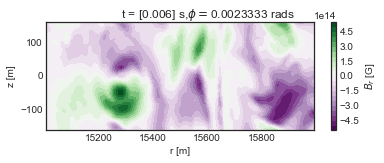

Angular component of B
Dimensions of new array    : (100, 34)


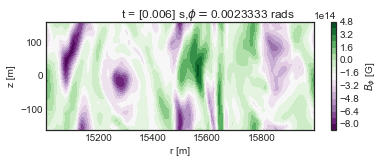

z-component of B
Dimensions of new array    : (100, 34)


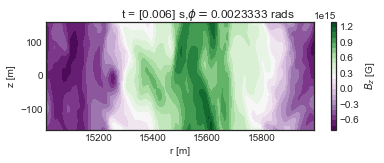

Radial component of v
Dimensions of new array    : (100, 34)


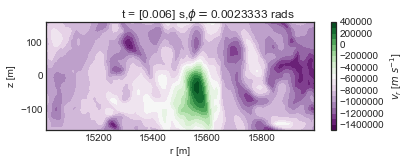

Angular component of v
Dimensions of new array    : (100, 34)


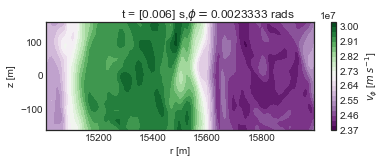

z-component of v
Dimensions of new array    : (100, 34)


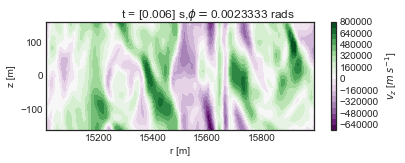

Density
Dimensions of new array    : (100, 34)


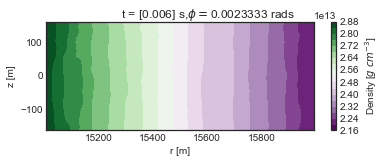

Pressure
Dimensions of new array    : (100, 34)


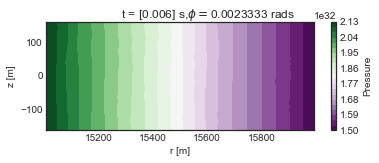

Potential
Dimensions of new array    : (100, 34)


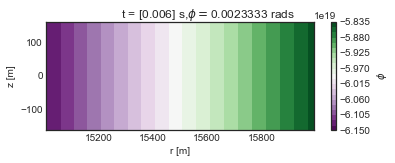

()

In [74]:
grafs('600',53)

In [29]:
varlist = read_data('60')
phi = varlist[2]
print(phi[53])

DATA FROM FILE:       600
time                     =  [0.006]
nr x nphi x nz           =  100  x  100  x  34
len(r), len(phi), len(z) =  100 100 34
Br                       :  (100, 100, 34)
Bphi                     :  (100, 100, 34)
Bz                       :  (100, 100, 34)
vr                       :  (100, 100, 34)
vphi                     :  (100, 100, 34)
vz                       :  (100, 100, 34)
rho                      :  (100, 100, 34)
Pgas                     :  (100, 100, 34)
phi                      :  (100, 100, 34)
0.0023332608638211394
